In [ ]:
from collections import Counter

from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
def plot_loss_curve(model, title):
    plt.plot(model.loss_curve_, '-o')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.title(title)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

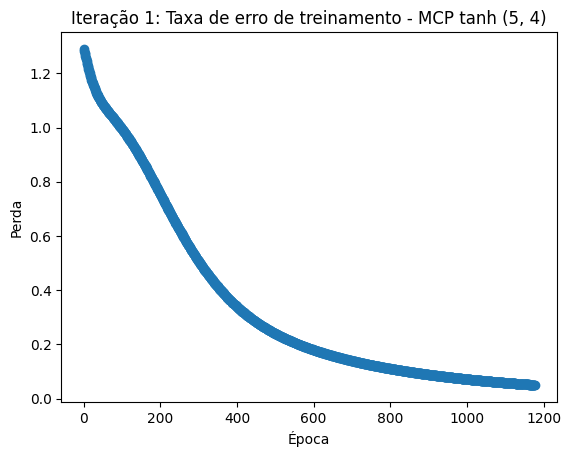

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1450) reached and the optimization hasn't converged yet.
  warnings.warn(


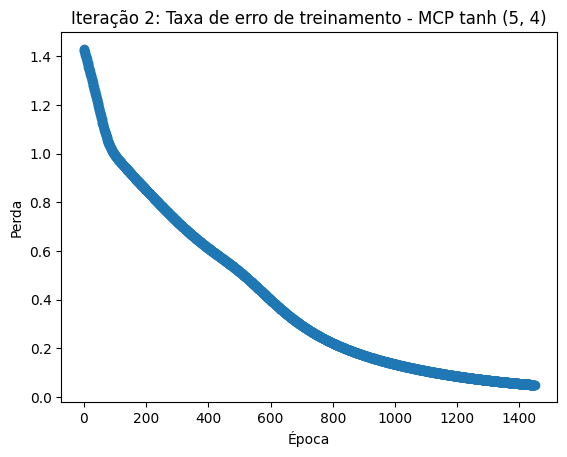

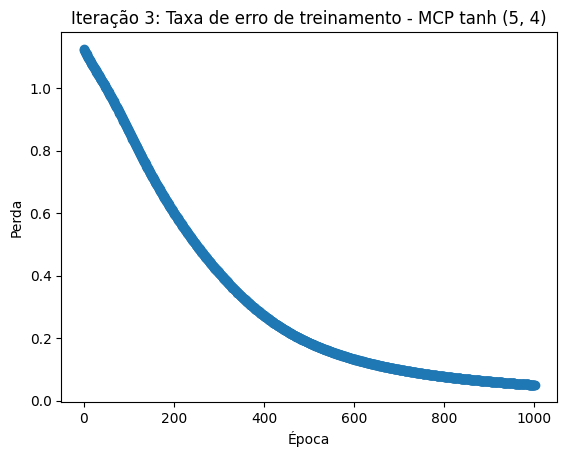

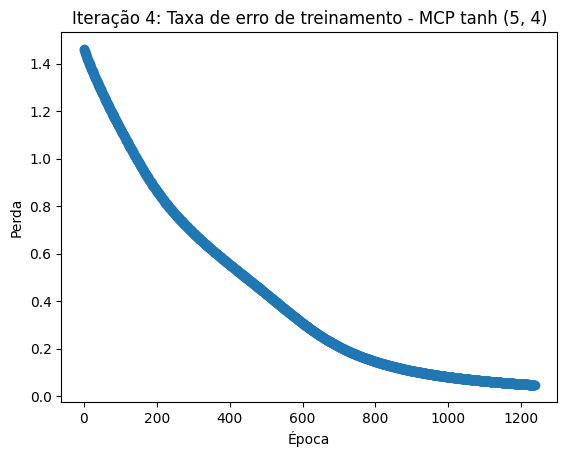

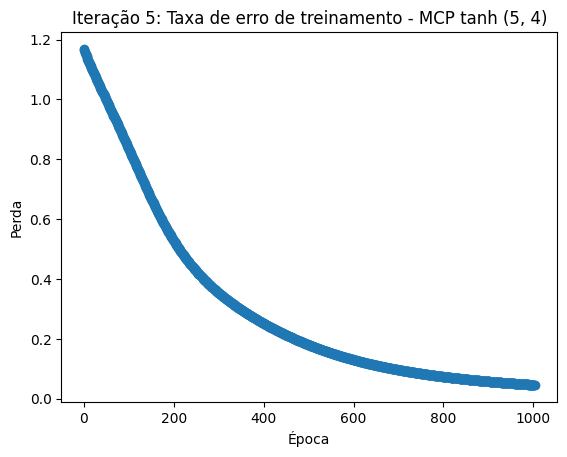

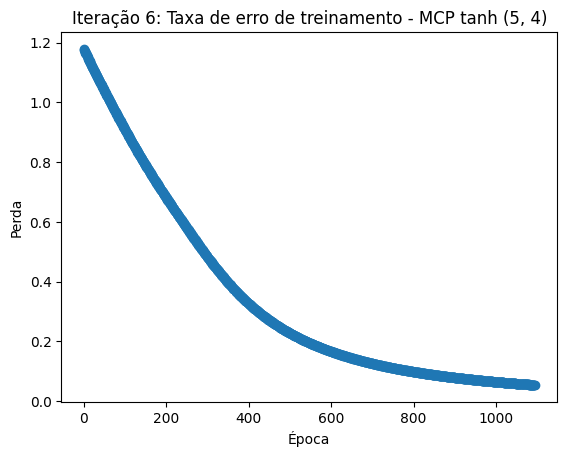

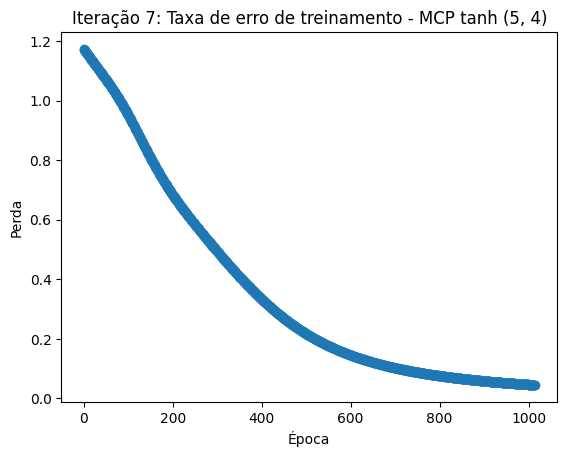

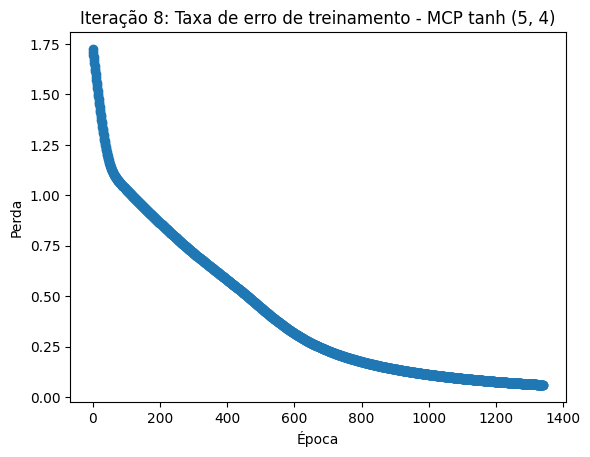

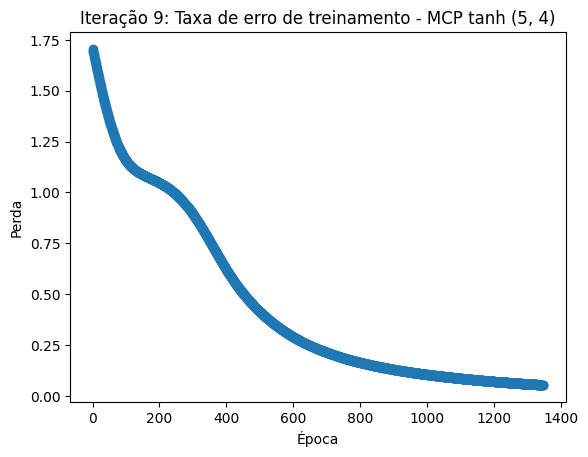

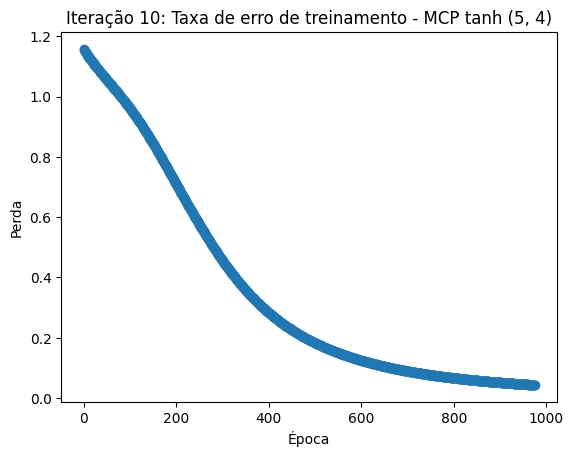

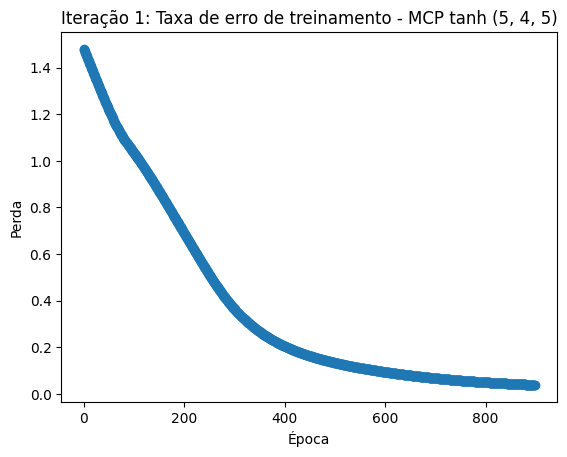

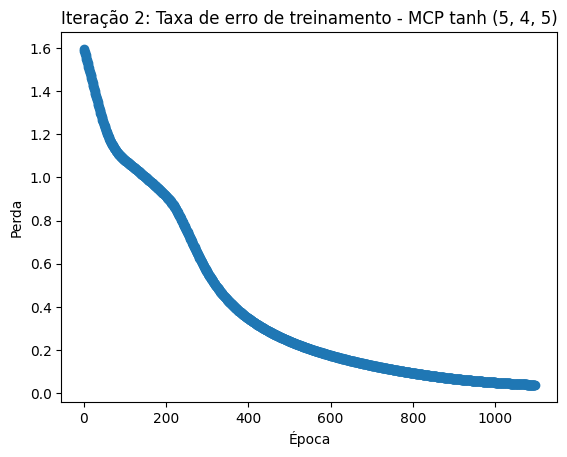

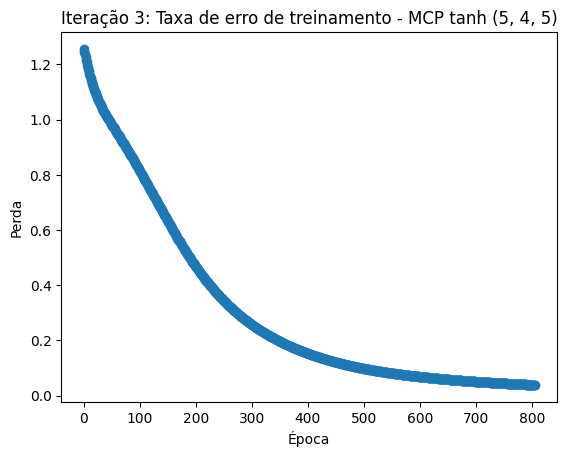

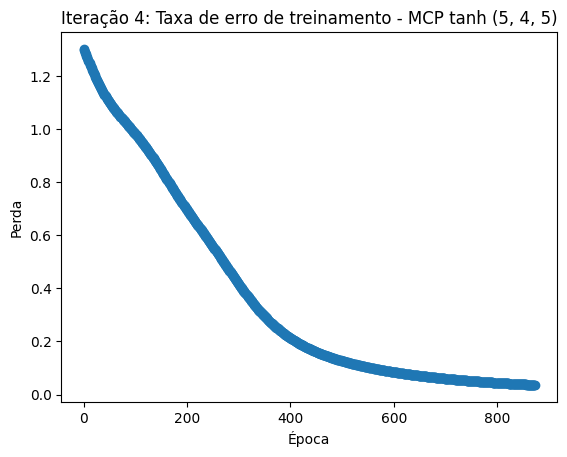

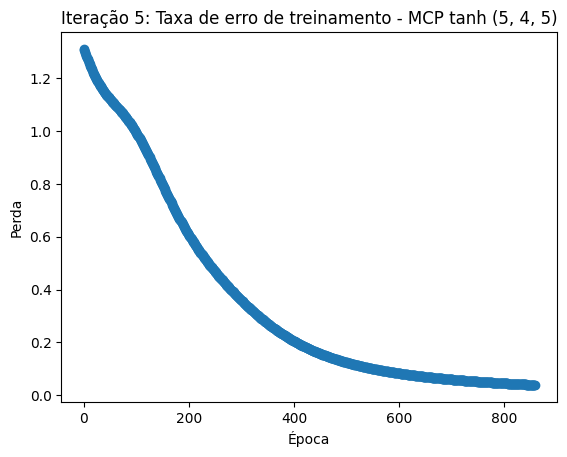

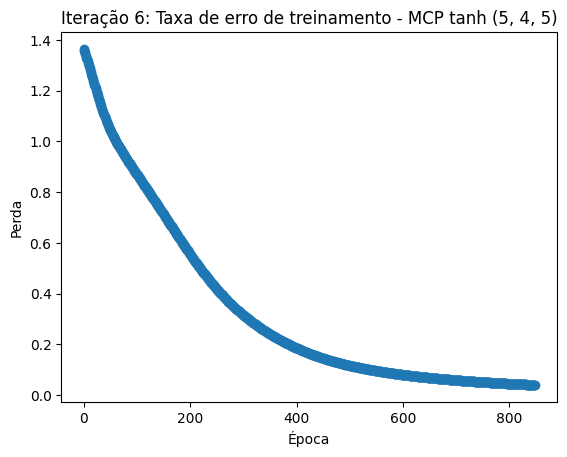

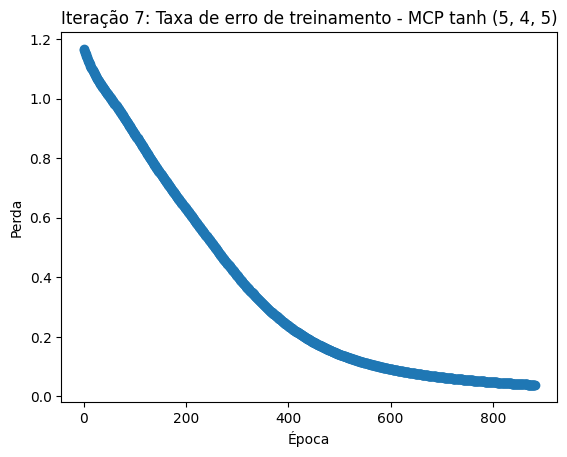

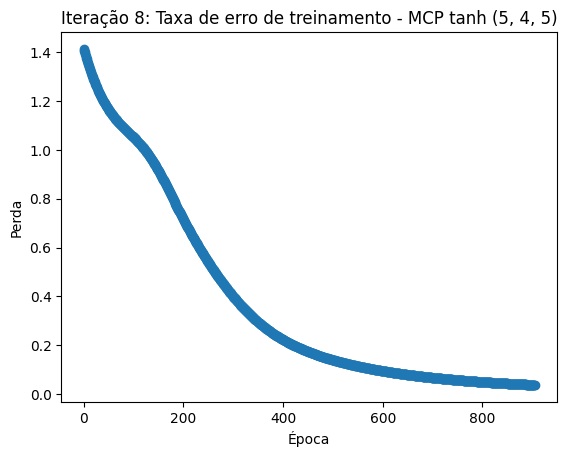

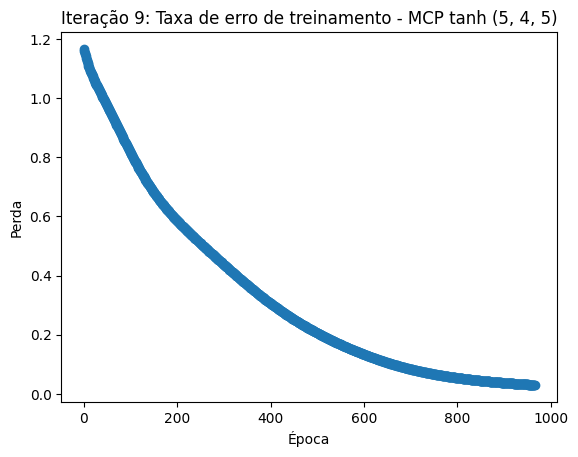

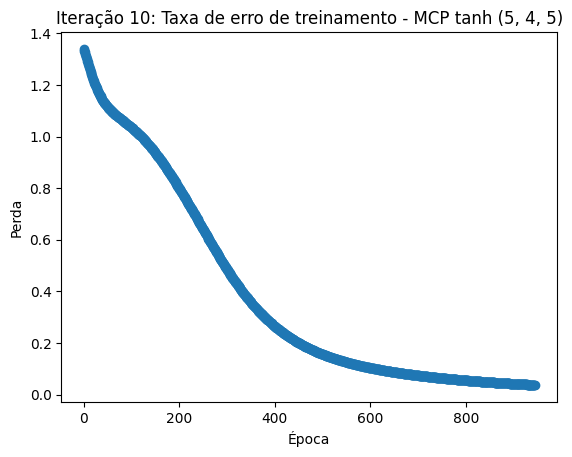

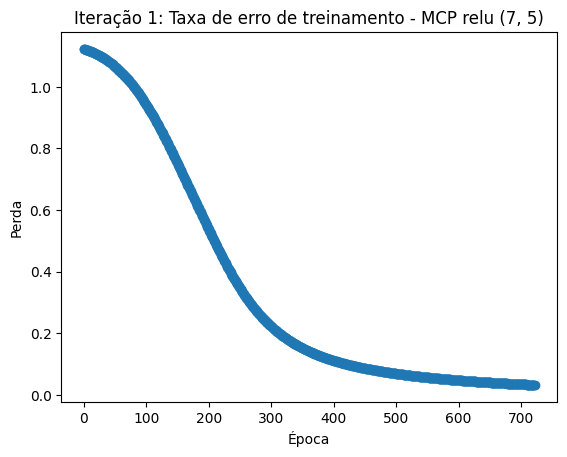

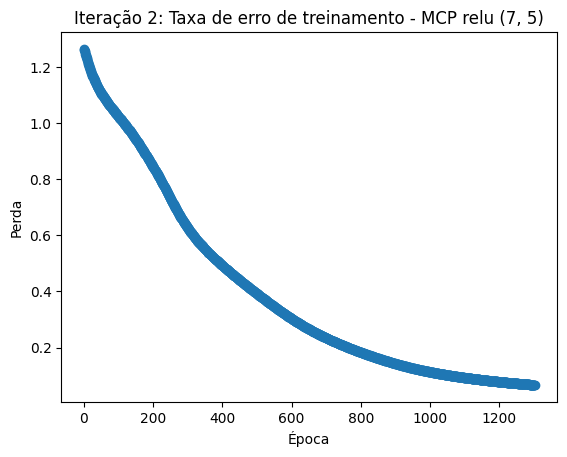

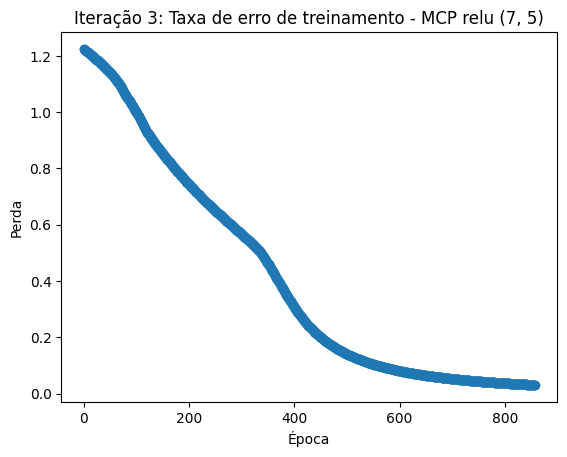

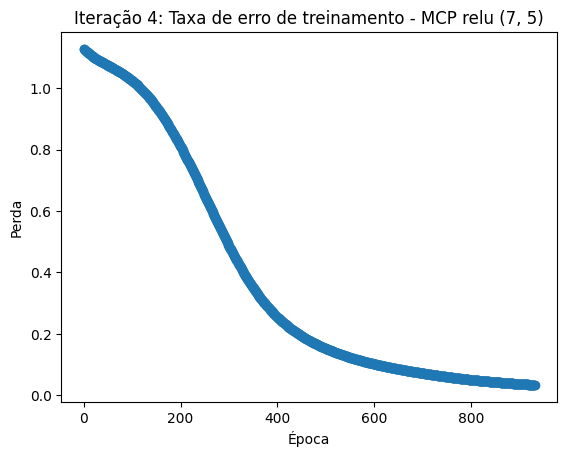

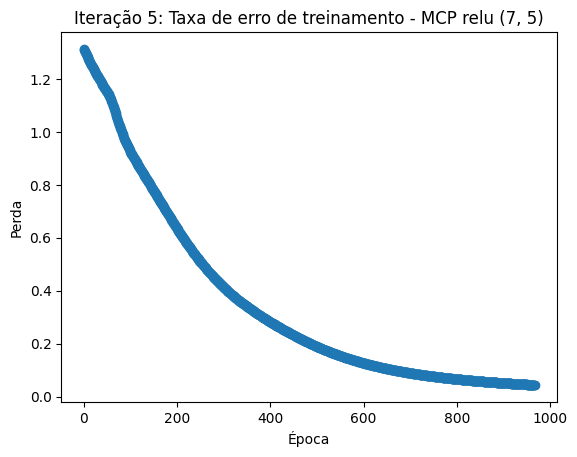

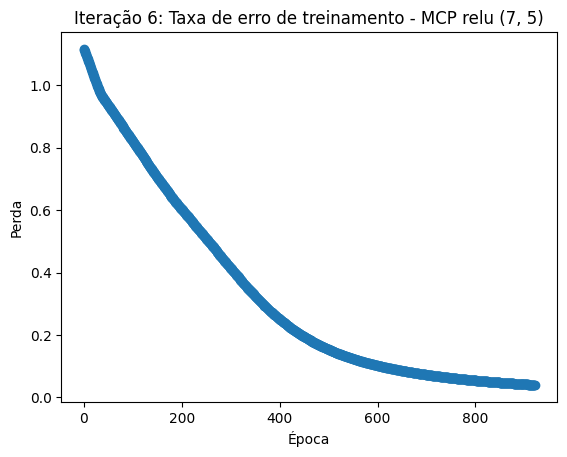

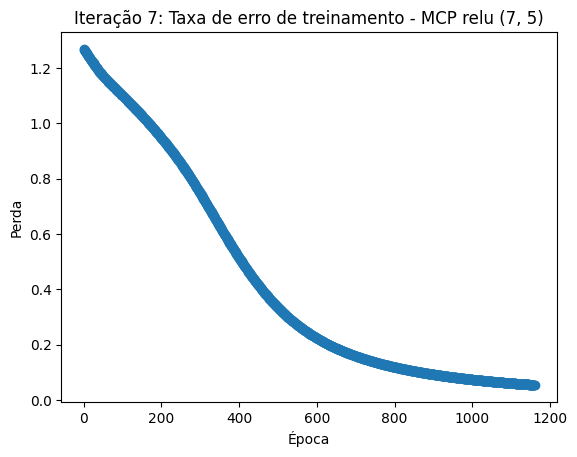

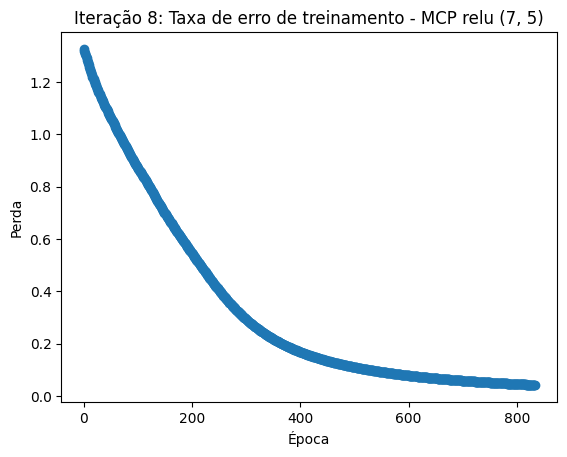

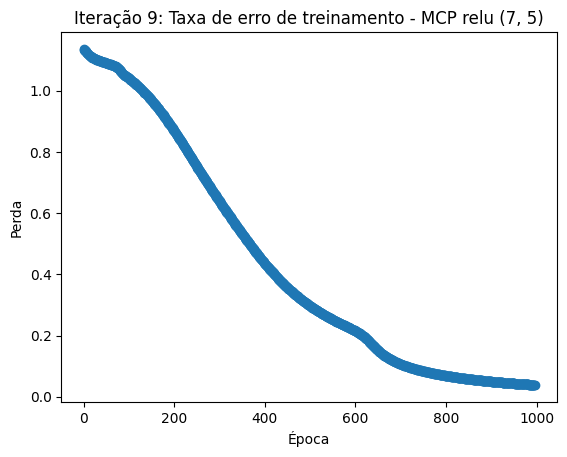

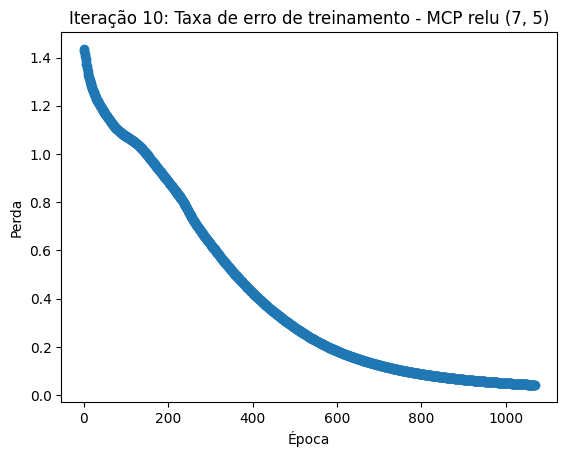

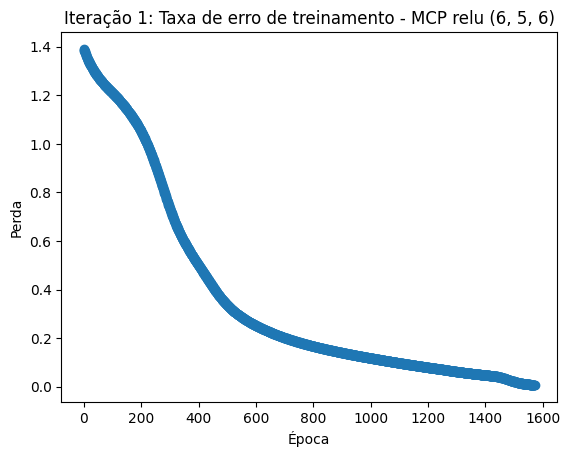

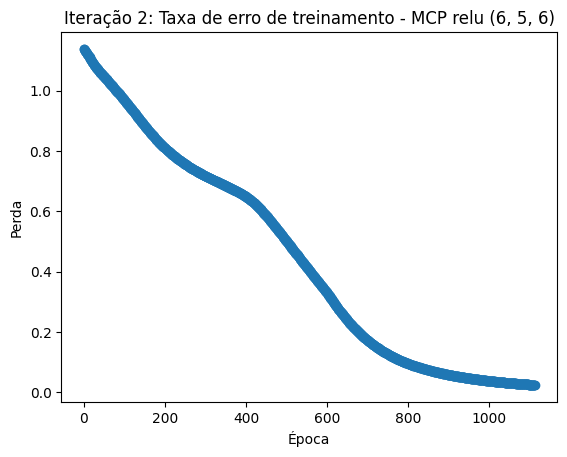

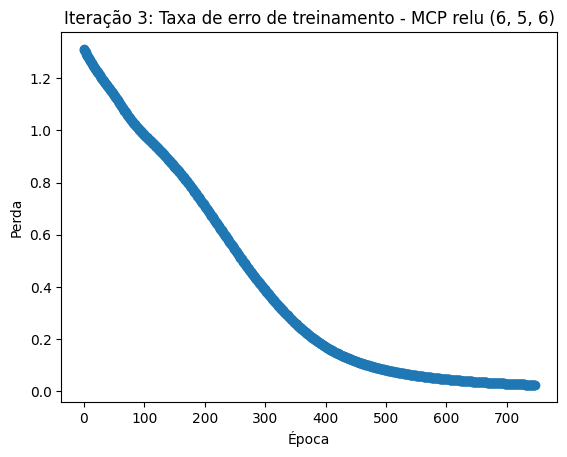

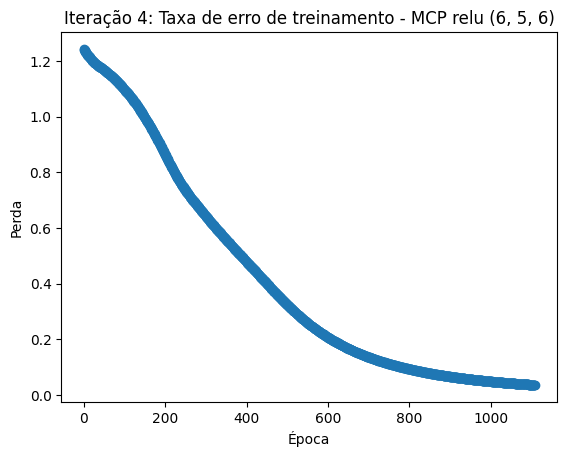

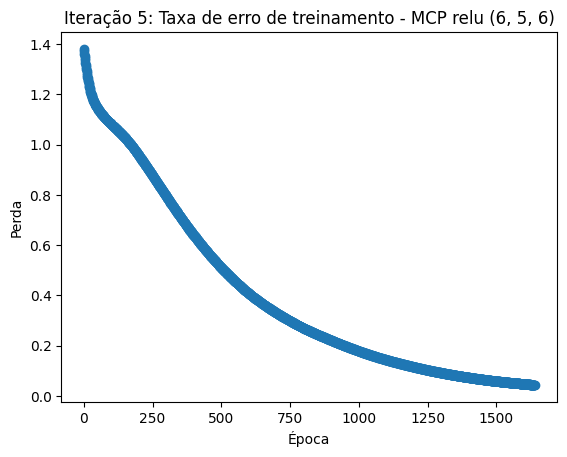

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1700) reached and the optimization hasn't converged yet.
  warnings.warn(


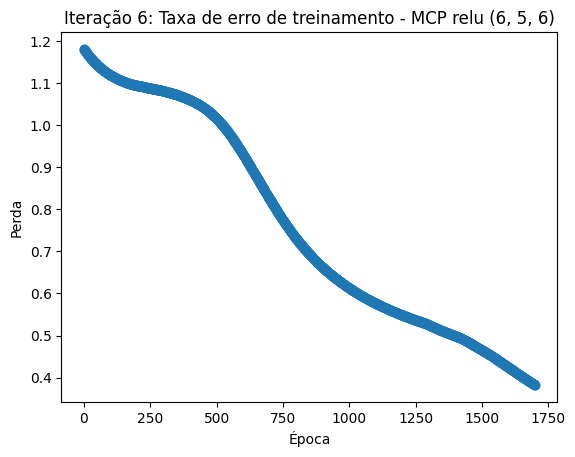

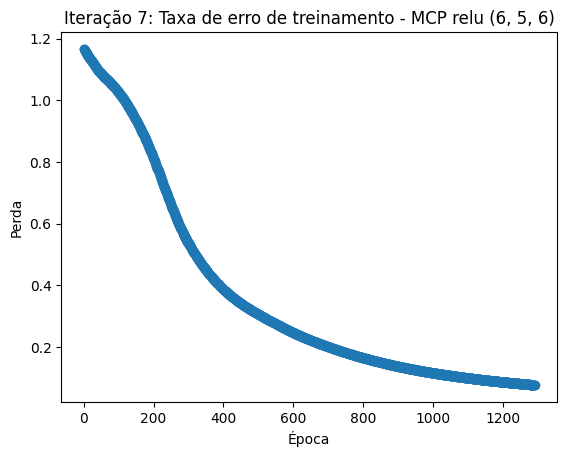

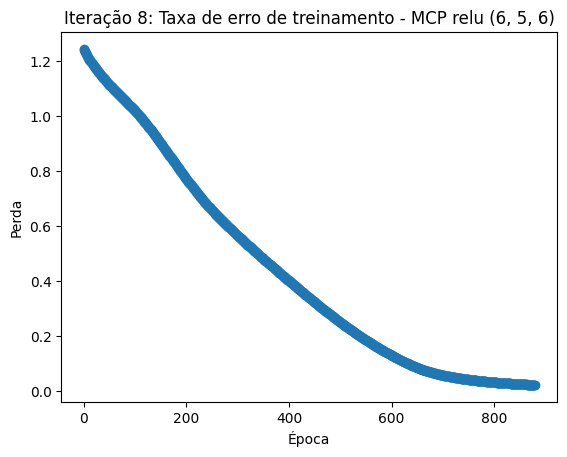

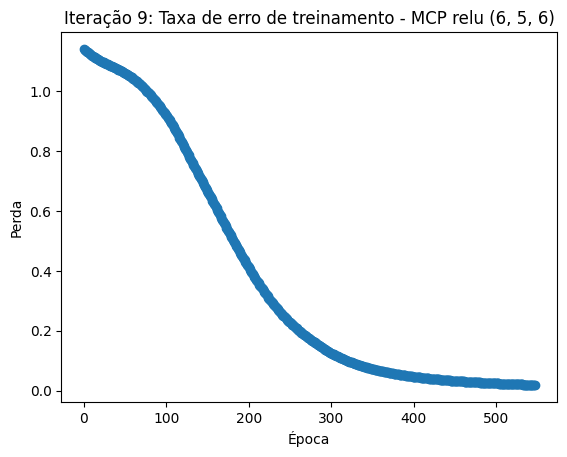

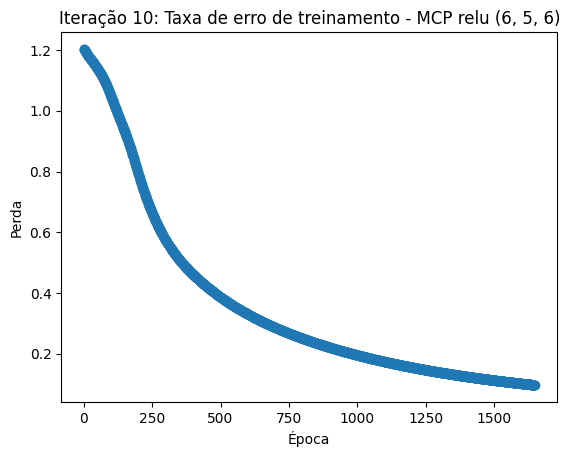

Estatísticas dos algoritmos executados:


,Algorítmos,% Acerto,% Erros
5,"Multilayer Perceptron com [5, 4, 5] neurônios ...",97.777778,2.222222
7,"Multilayer Perceptron com [6, 5, 6] neurônios ...",97.777778,2.222222
6,"Multilayer Perceptron com [7, 5] neurônios int...",97.222222,2.777778
4,"Multilayer Perceptron com [5, 4] neurônios int...",97.189542,2.810458
3,10-KNN,96.633987,3.366013
2,5-KNN,96.045752,3.954248
8,2-KMeans,93.856209,6.143791
0,Árvore de Decisão Com Critério Entropia,88.692810,11.307190
1,Árvore de Decisão Com Critério Gini,86.470588,13.529412


In [ ]:
#WINE

#Lendo o CSV e Adicionando o header das colunas
url = "https://raw.githubusercontent.com/mariarita26/TopicosEspeciais/main/wine.data"

dataset = pd.read_csv(url, header=None)

columns = len(dataset.columns)

y = dataset[0] # extrai a primeira coluna, que é o label
X = dataset.loc[:,1:columns-1]

#Normalização de todas as colunas
x2 = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
X = pd.DataFrame(x_scaled)
folds = 10
kf = StratifiedKFold(n_splits = folds)

#Declaração das variáveis

X_train = []
y_train = []

X_test = []
y_test = []

X = np.array(X)
y = np.array(y)

for train_index, test_index in kf.split(X, y):
  X_train.append(X[train_index])
  X_test.append(X[test_index])

  y_train.append(y[train_index])
  y_test.append(y[test_index])

results = {'Árvore de Decisão Com Critério Entropia': [],
           'Árvore de Decisão Com Critério Gini': [],
           '5-KNN': [],
           '10-KNN': [],
           'Multilayer Perceptron com [5, 4] neurônios internos e função de ativação tanh': [],
           'Multilayer Perceptron com [5, 4, 5] neurônios internos e função de ativação tanh': [],
           'Multilayer Perceptron com [7, 5] neurônios internos e função de ativação relu': [],
           'Multilayer Perceptron com [6, 5, 6] neurônios internos e função de ativação relu': [],
           "2-KMeans": []}

#Treinamento dos modelos
for i in range(folds):
    model = DecisionTreeClassifier(criterion="entropy")
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Árvore de Decisão Com Critério Entropia'].append(acc)

    model = DecisionTreeClassifier(criterion="gini")
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Árvore de Decisão Com Critério Gini'].append(acc)

    model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', algorithm='brute')
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['5-KNN'].append(acc)

    model = KNeighborsClassifier(n_neighbors=10, metric='euclidean', algorithm='brute')
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['10-KNN'].append(acc)

    myset = set(y_train[i])
    clusters = len(myset)
    model = KMeans(n_clusters=clusters, algorithm='lloyd')
    model = model.fit(X_train[i])
    labels = model.labels_
    map_labels = []
    for a in range (clusters):
        map_labels.append([])

    new_y_train = y_train[i].tolist()

    for b in range(len(y_train[i])):
        for c in range(clusters):
            if labels[b] == c:
                map_labels[c].append(new_y_train[b])

    mapping = {}

    for d in range(clusters):
        final = Counter(map_labels[d])
        value = final.most_common(1)[0][0]
        mapping[d] = value

    result = model.predict(X_test[i])
    result = [mapping[j] for j in result]

    acc = metrics.accuracy_score(result, y_test[i])

    results['2-KMeans'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(5, 4), activation='tanh', max_iter=1450)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP tanh (5, 4)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [5, 4] neurônios internos e função de ativação tanh'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(5, 4, 5), activation='tanh',max_iter=1150)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP tanh (5, 4, 5)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [5, 4, 5] neurônios internos e função de ativação tanh'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(7, 5), activation='relu', max_iter=1580)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP relu (7, 5)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [7, 5] neurônios internos e função de ativação relu'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(6, 5, 6), activation='relu',max_iter=1700)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP relu (6, 5, 6)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [6, 5, 6] neurônios internos e função de ativação relu'].append(acc)


#Impressão dos resultados
algoritmos = []
taxas_acerto = []
taxas_erro  = []

for key, value in results.items():
    taxa_acerto = np.mean(results[key])
    taxa_erro = 1 - taxa_acerto
    algoritmo = key

    algoritmos.append(algoritmo)
    taxas_acerto.append(taxa_acerto*100)
    taxas_erro.append(taxa_erro*100)


taxas = pd.DataFrame({
    "Algorítmos": algoritmos,
    "% Acerto": taxas_acerto,
    "% Erros": taxas_erro
})

# Ordenar o dataframe pela acurácia em ordem decrescente
relatorio_final = taxas.sort_values("% Acerto", ascending=False)

print('Estatísticas dos algoritmos executados:')
display(relatorio_final)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

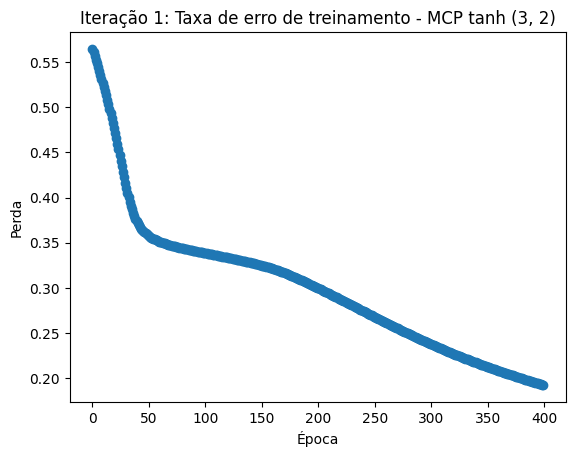

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


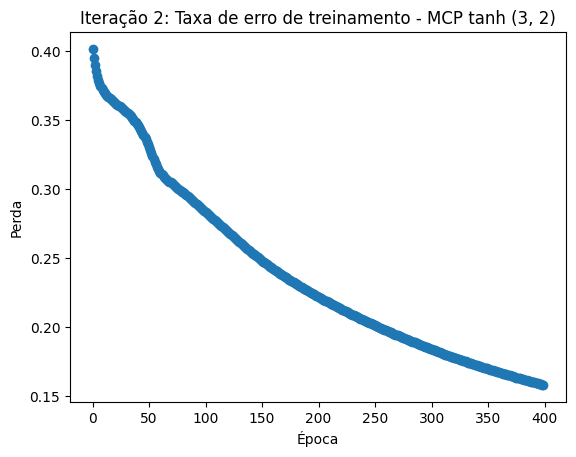

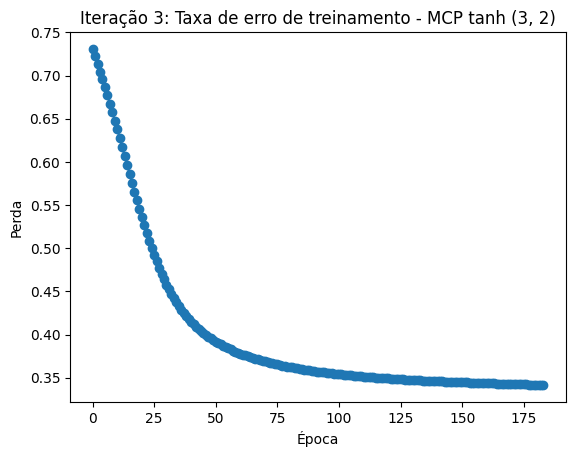

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


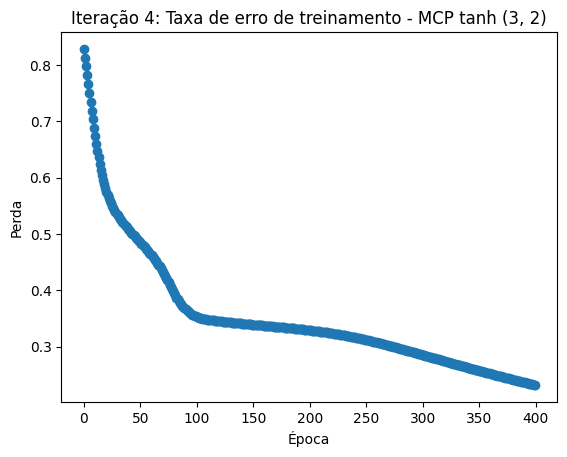

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


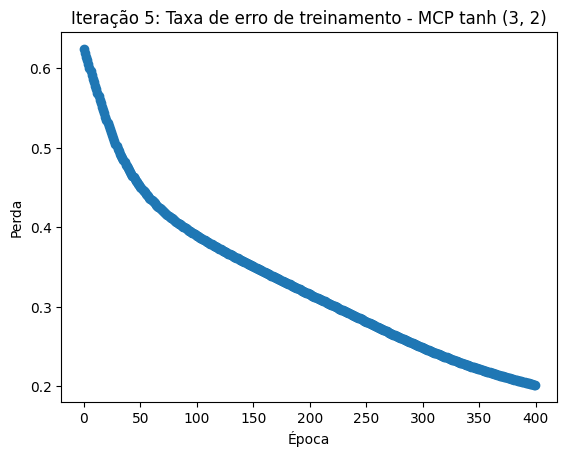

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


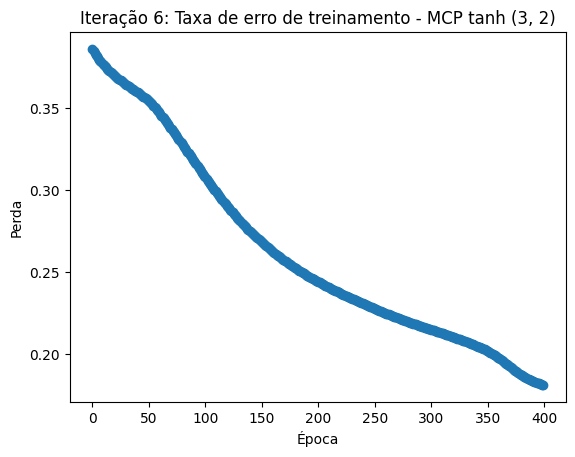

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


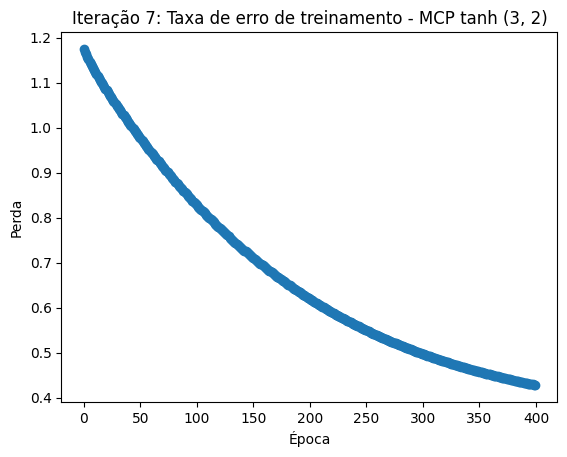

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


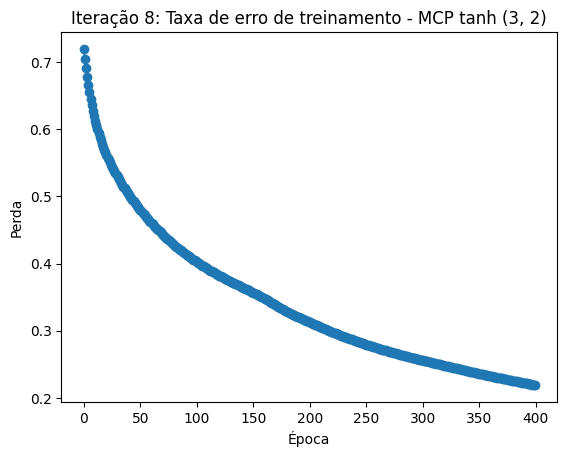

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


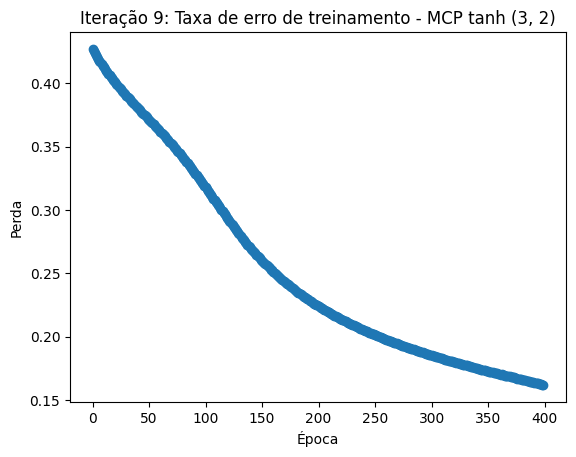

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


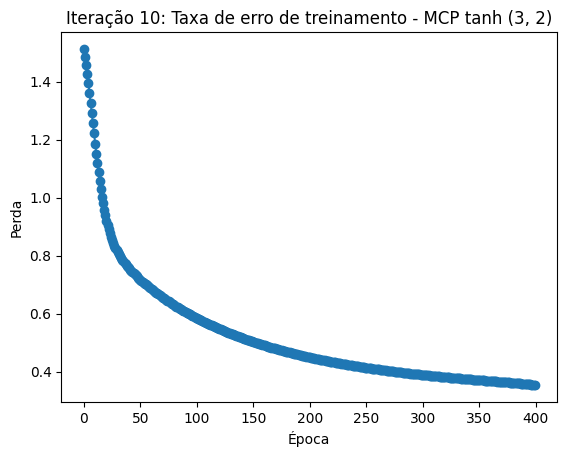

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


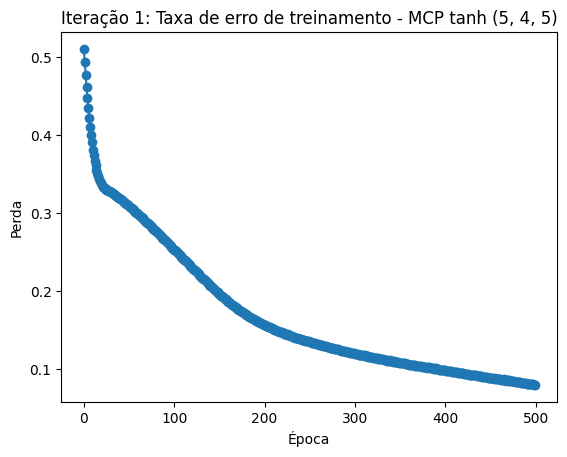

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


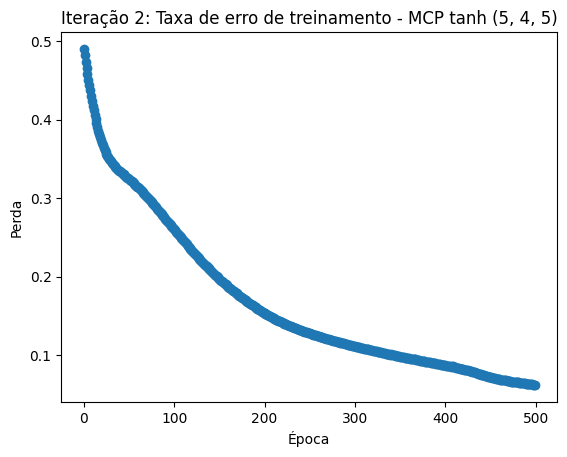

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


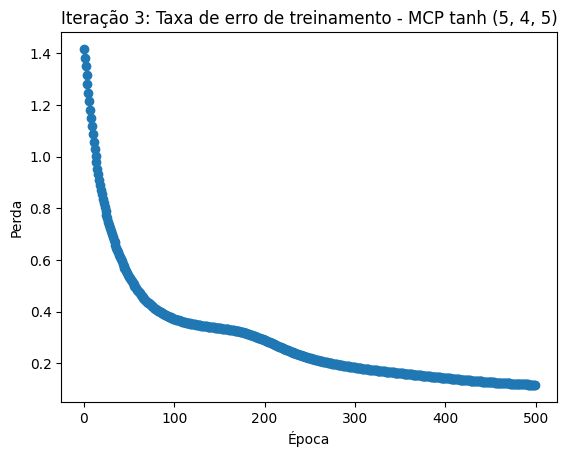

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


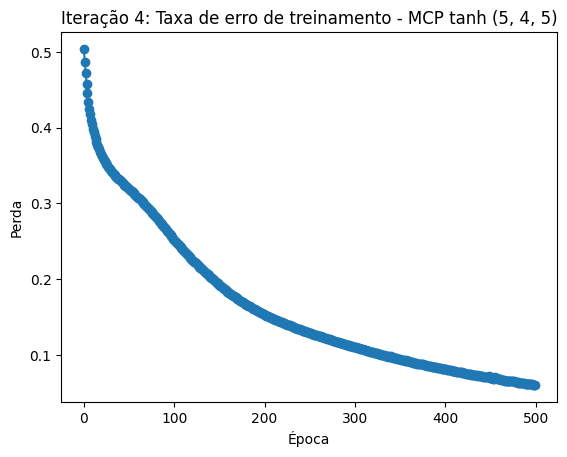

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


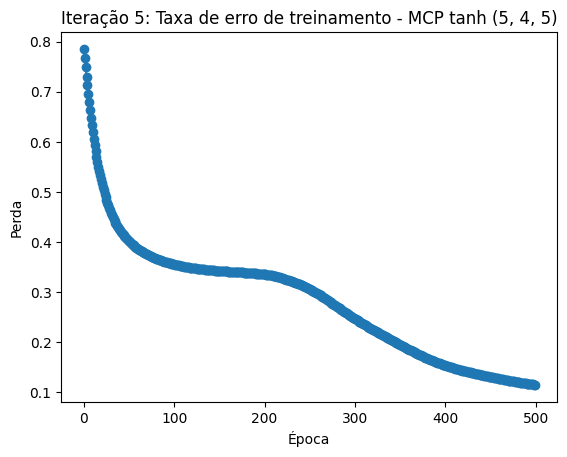

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


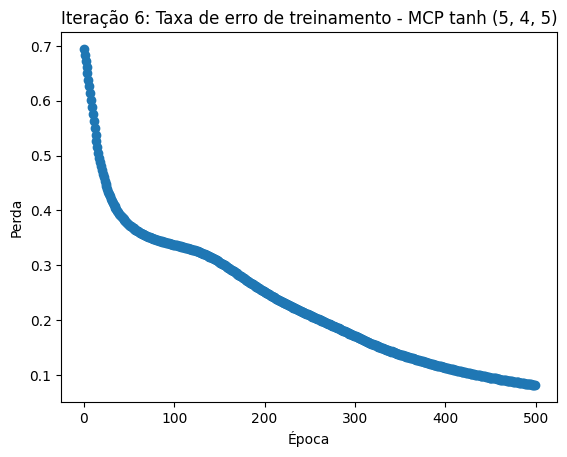

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


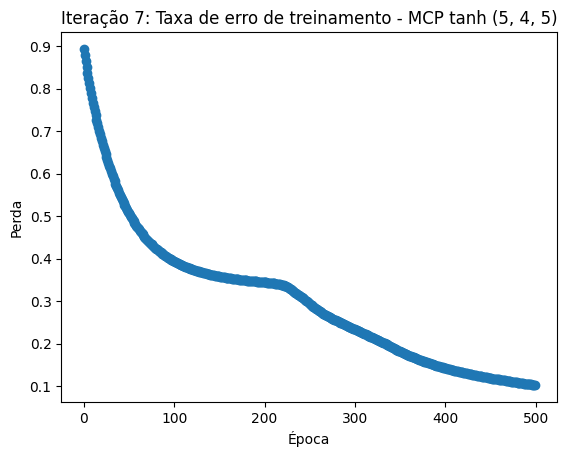

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


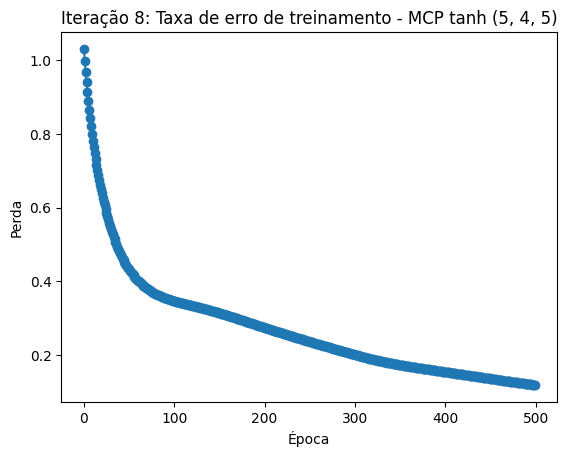

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


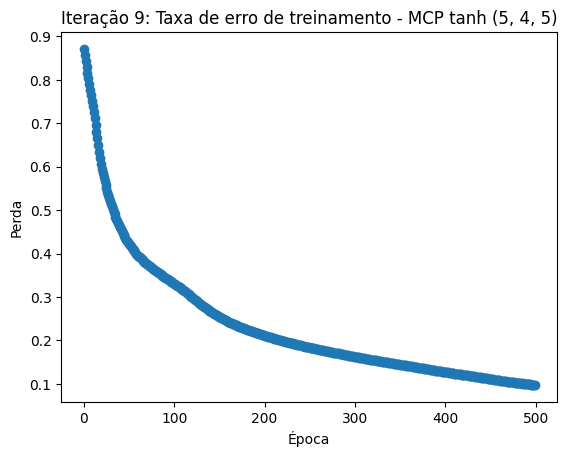

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


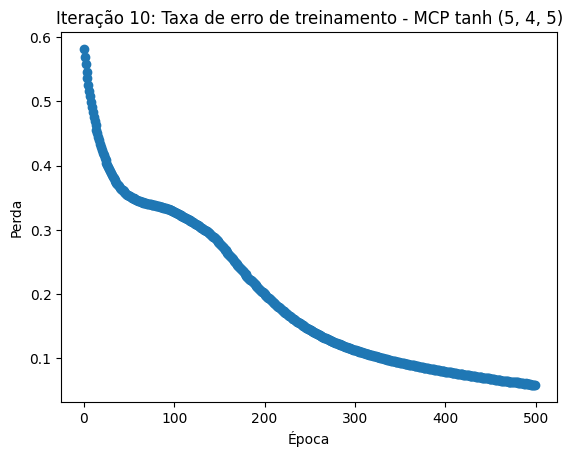

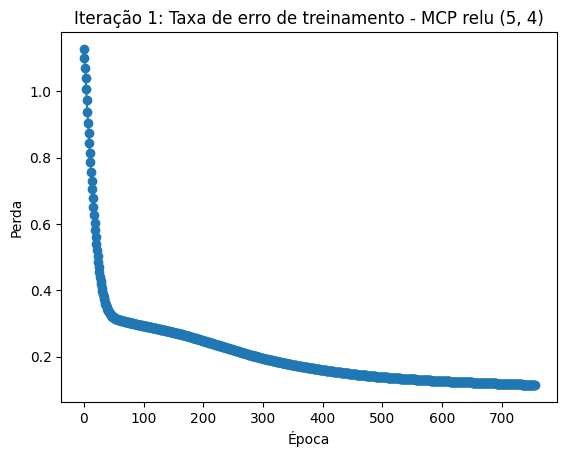

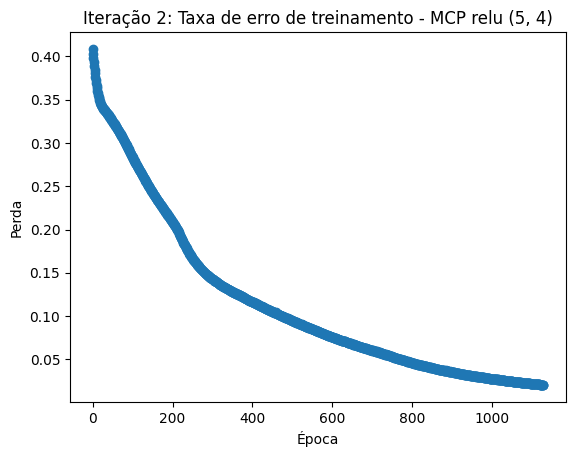

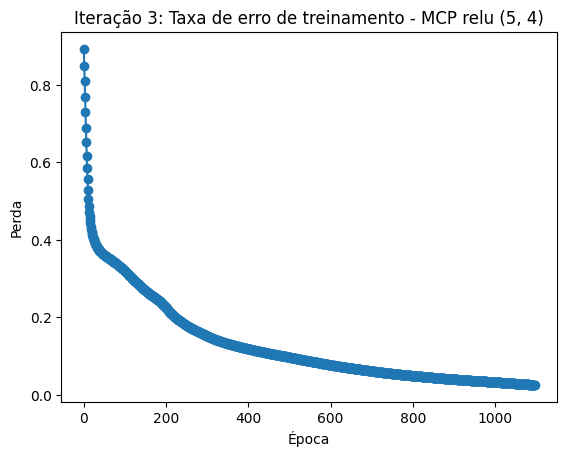

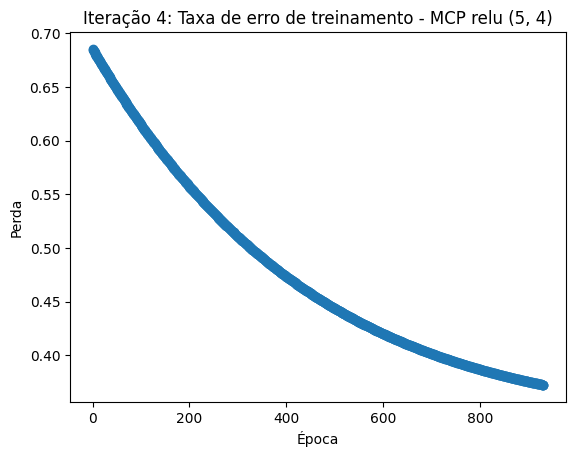

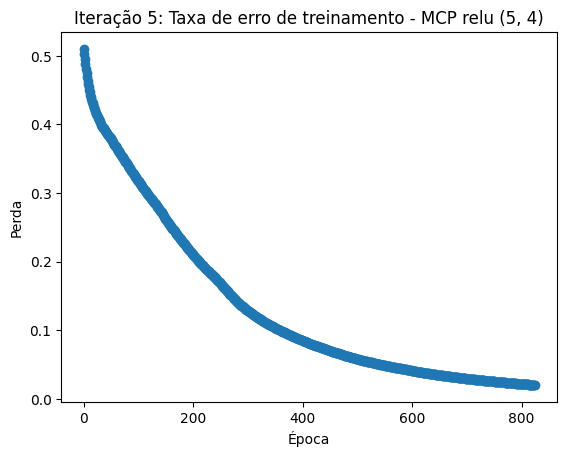

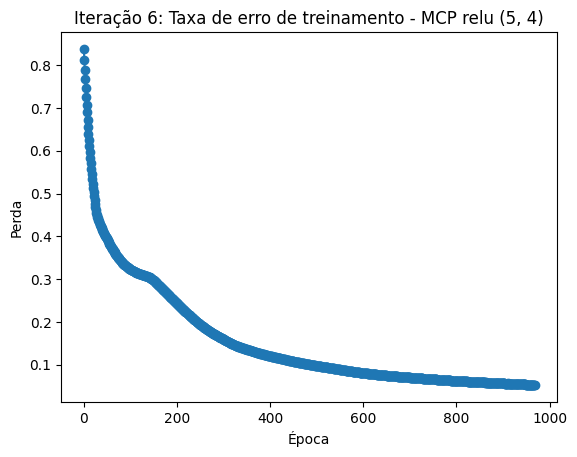

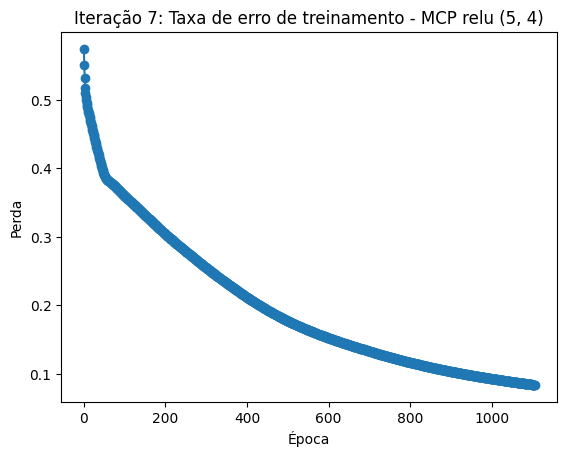

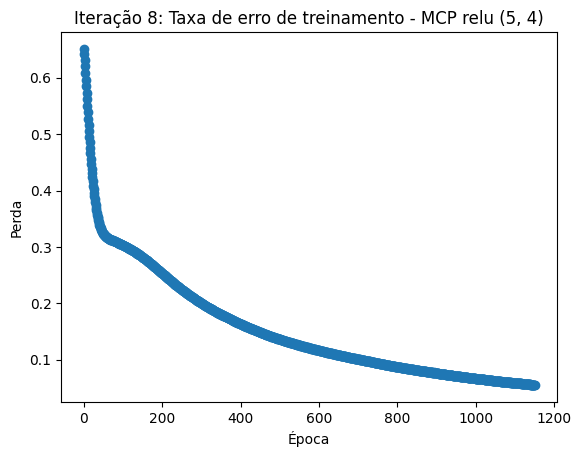

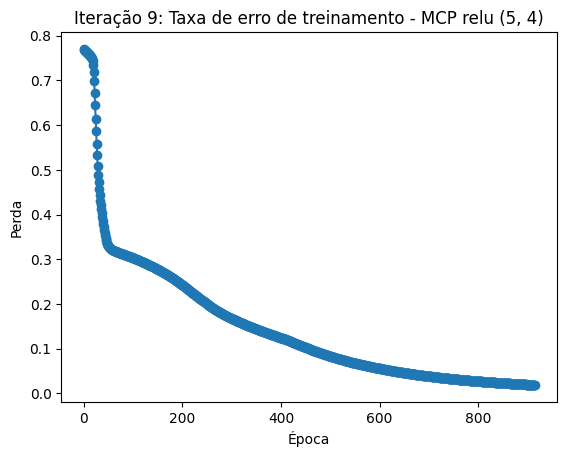

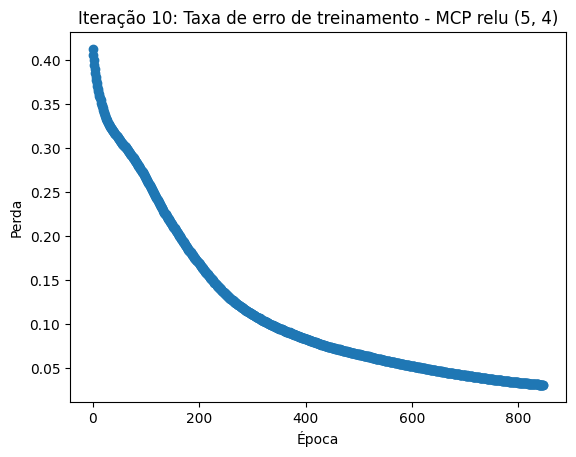

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


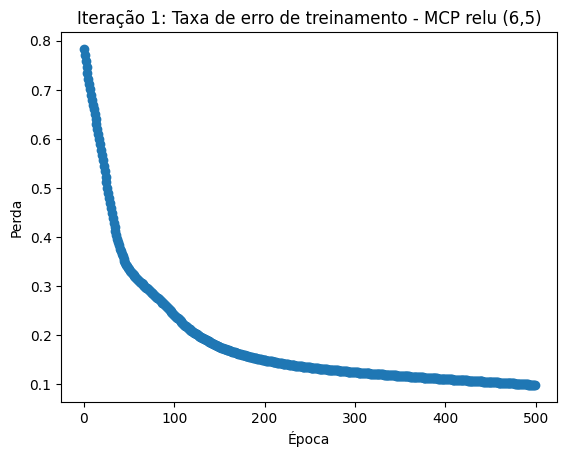

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


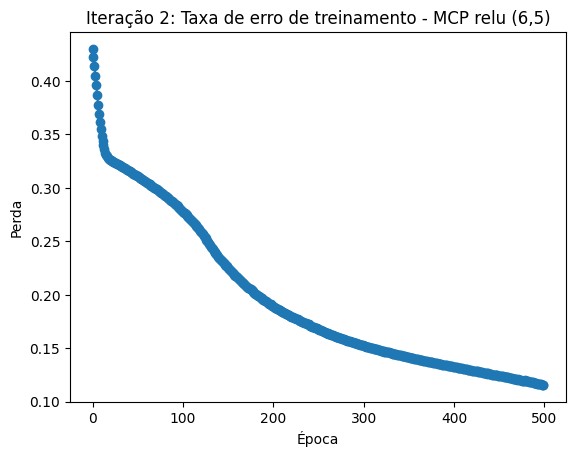

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


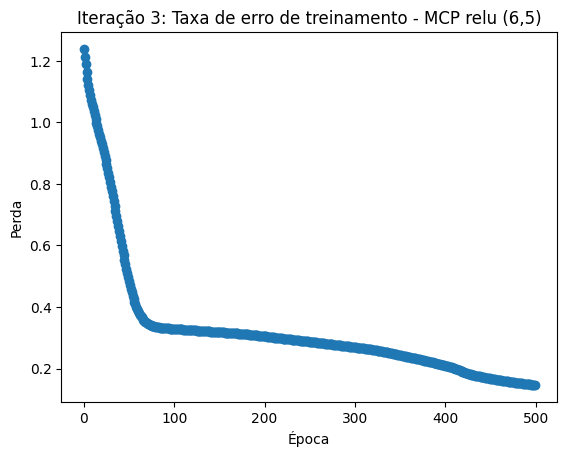

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


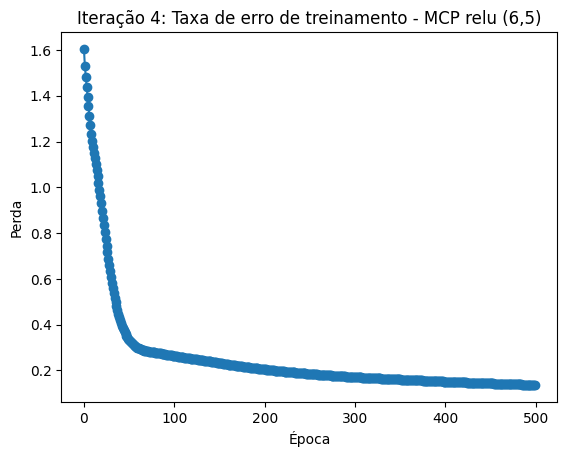

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


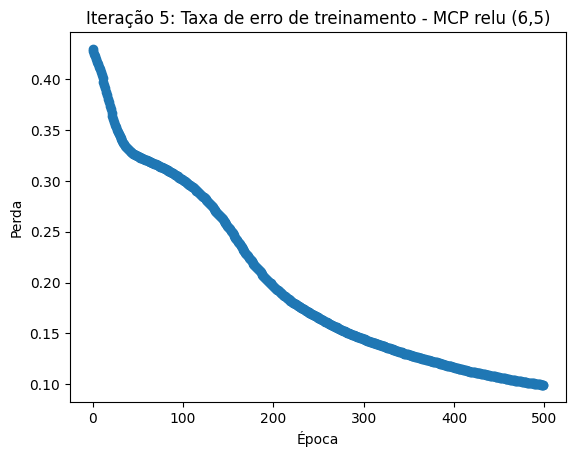

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


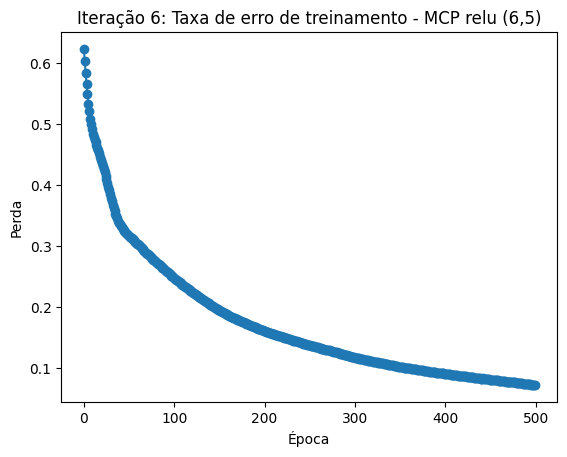

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


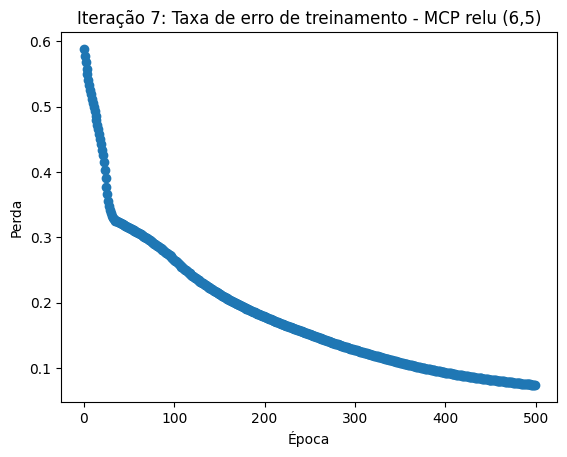

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


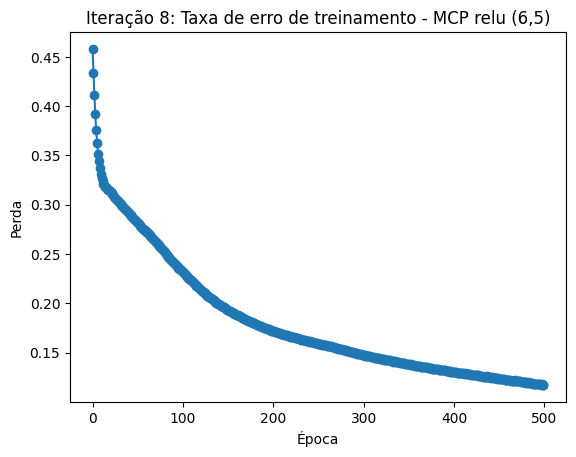

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


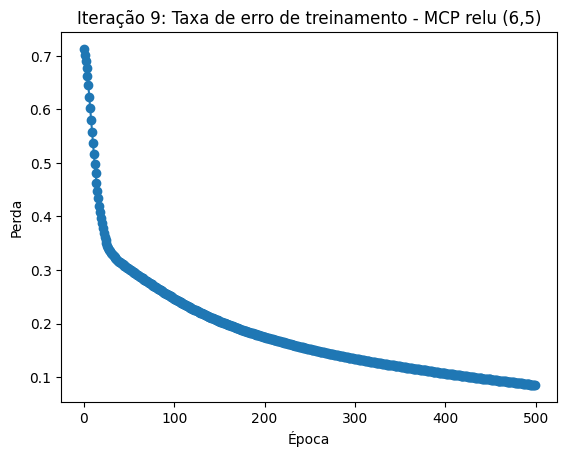

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


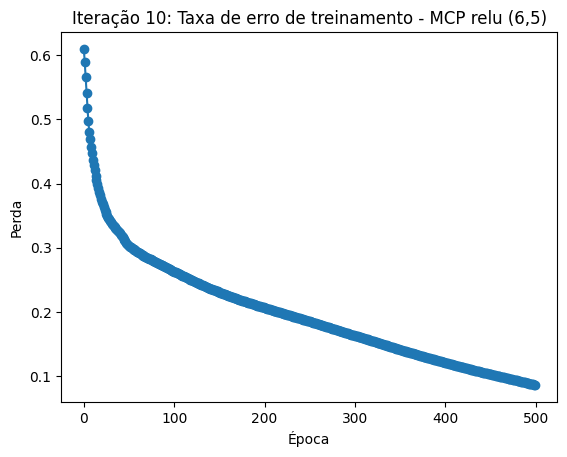

Estatísticas dos algoritmos executados:


,Algorítmos,% Acerto,% Erros
1,Árvore de Decisão Com Critério Gini,90.325397,9.674603
4,"Multilayer Perceptron com [3, 2] neurônios int...",90.309524,9.690476
6,"Multilayer Perceptron com [5, 4] neurônios int...",89.753968,10.246032
7,"Multilayer Perceptron com [6, 5] neurônios int...",89.738095,10.261905
3,10-KNN,89.174603,10.825397
8,2-KMeans,89.174603,10.825397
5,"Multilayer Perceptron com [5, 4, 5] neurônios ...",89.166667,10.833333
2,5-KNN,88.873016,11.126984
0,Árvore de Decisão Com Critério Entropia,86.912698,13.087302


In [49]:
#IONOSPHERE

#Lendo o CSV e Adicionando o header das colunas
url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/datasets/ionosphere.data"

dataset = pd.read_csv(url, header=None)

columns = len(dataset.columns)

y = dataset[0] # extrai a primeira coluna, que é o label
X = dataset.loc[:,1:columns-1]

#Normalização de todas as colunas
x2 = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
X = pd.DataFrame(x_scaled)
folds = 10
kf = StratifiedKFold(n_splits = folds)

#Declaração das variáveis

X_train = []
y_train = []

X_test = []
y_test = []

X = np.array(X)
y = np.array(y)

for train_index, test_index in kf.split(X, y):
  X_train.append(X[train_index])
  X_test.append(X[test_index])

  y_train.append(y[train_index])
  y_test.append(y[test_index])

results = {'Árvore de Decisão Com Critério Entropia': [],
           'Árvore de Decisão Com Critério Gini': [],
           '5-KNN': [],
           '10-KNN': [],
           'Multilayer Perceptron com [3, 2] neurônios internos e função de ativação tanh': [],
           'Multilayer Perceptron com [5, 4, 5] neurônios internos e função de ativação tanh': [],
           'Multilayer Perceptron com [5, 4] neurônios internos e função de ativação relu': [],
           'Multilayer Perceptron com [6, 5] neurônios internos e função de ativação relu': [],
           "2-KMeans": []}

#Treinamento dos modelos


for i in range(folds):
    model = DecisionTreeClassifier(criterion="entropy")
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Árvore de Decisão Com Critério Entropia'].append(acc)

    model = DecisionTreeClassifier(criterion="gini")
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Árvore de Decisão Com Critério Gini'].append(acc)

    model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', algorithm='brute')
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['5-KNN'].append(acc)

    model = KNeighborsClassifier(n_neighbors=10, metric='euclidean', algorithm='brute')
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['10-KNN'].append(acc)

    myset = set(y_train[i])
    clusters = len(myset)
    model = KMeans(n_clusters=clusters, algorithm='lloyd')
    model = model.fit(X_train[i])
    labels = model.labels_
    map_labels = []
    for a in range (clusters):
        map_labels.append([])

    new_y_train = y_train[i].tolist()

    for b in range(len(y_train[i])):
        for c in range(clusters):
            if labels[b] == c:
                map_labels[c].append(new_y_train[b])

    mapping = {}

    for d in range(clusters):
        final = Counter(map_labels[d])
        value = final.most_common(1)[0][0]
        mapping[d] = value

    result = model.predict(X_test[i])
    result = [mapping[j] for j in result]

    acc = metrics.accuracy_score(result, y_test[i])

    results['2-KMeans'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(3, 2), activation='tanh',max_iter=400)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP tanh (3, 2)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [3, 2] neurônios internos e função de ativação tanh'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(5, 4, 5), activation='tanh',max_iter=500)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP tanh (5, 4, 5)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [5, 4, 5] neurônios internos e função de ativação tanh'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(5, 4), activation='relu', max_iter=1680)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP relu (5, 4)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [5, 4] neurônios internos e função de ativação relu'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(6, 5), activation='relu',max_iter=500)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP relu (6,5)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [6, 5] neurônios internos e função de ativação relu'].append(acc)


#Impressão dos resultados
algoritmos = []
taxas_acerto = []
taxas_erro  = []

for key, value in results.items():
    taxa_acerto = np.mean(results[key])
    taxa_erro = 1 - taxa_acerto
    algoritmo = key

    algoritmos.append(algoritmo)
    taxas_acerto.append(taxa_acerto*100)
    taxas_erro.append(taxa_erro*100)


taxas = pd.DataFrame({
    "Algorítmos": algoritmos,
    "% Acerto": taxas_acerto,
    "% Erros": taxas_erro
})

# Ordenar o dataframe pela acurácia em ordem decrescente
relatorio_final = taxas.sort_values("% Acerto", ascending=False)

print('Estatísticas dos algoritmos executados:')
display(relatorio_final)


<ipython-input-44-7b81cbbfe127>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataFrame = pd.read_csv(url, sep=', ', names=[
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the war

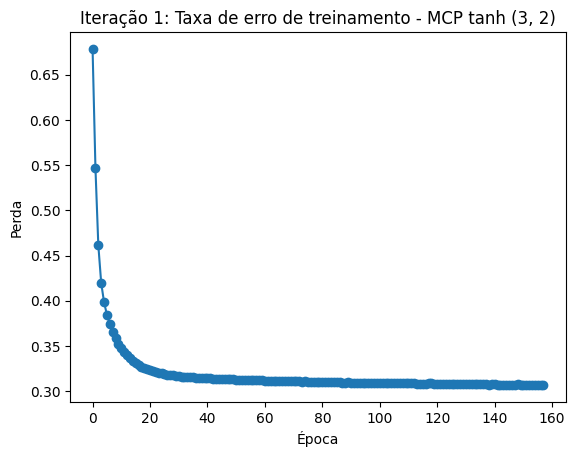

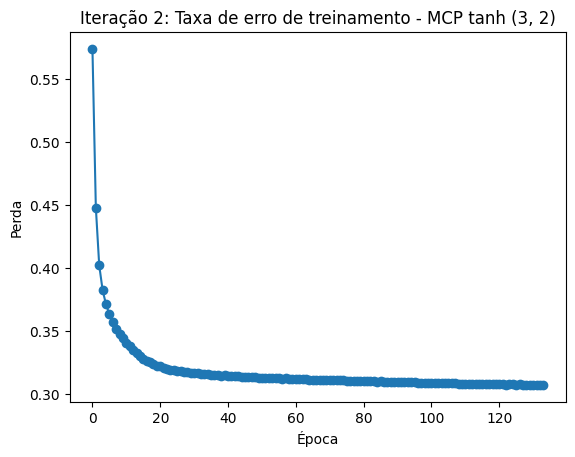

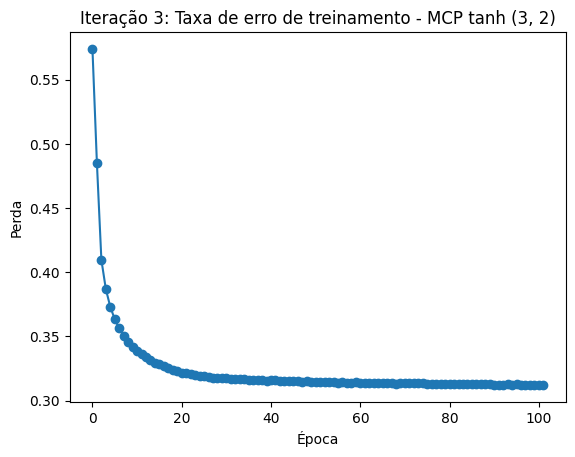

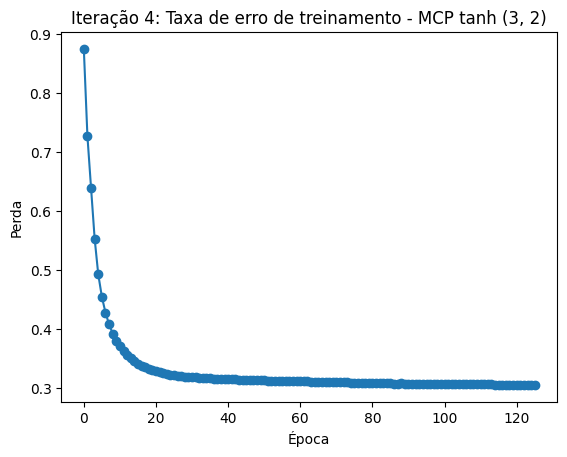

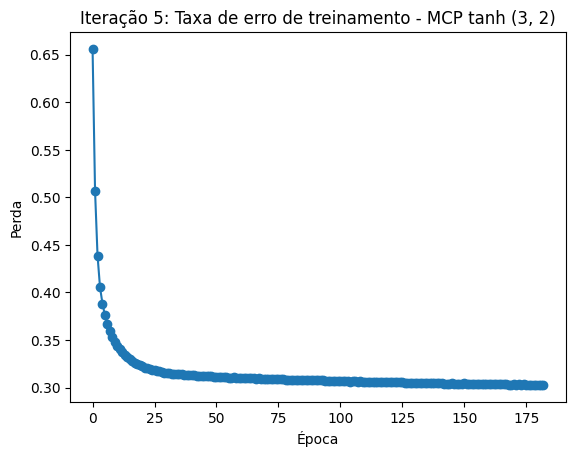

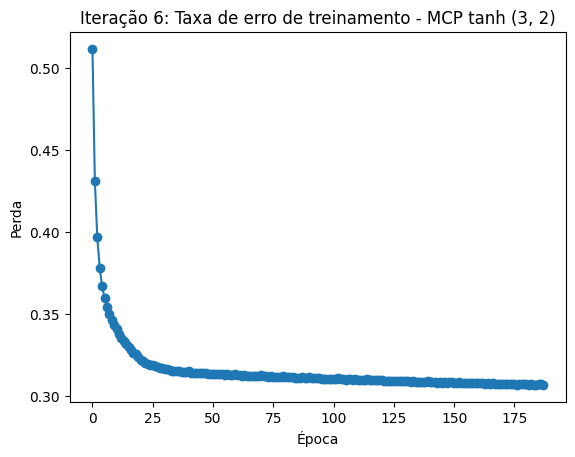

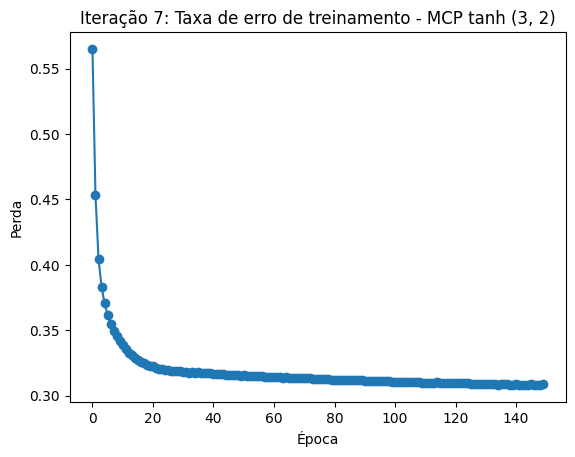

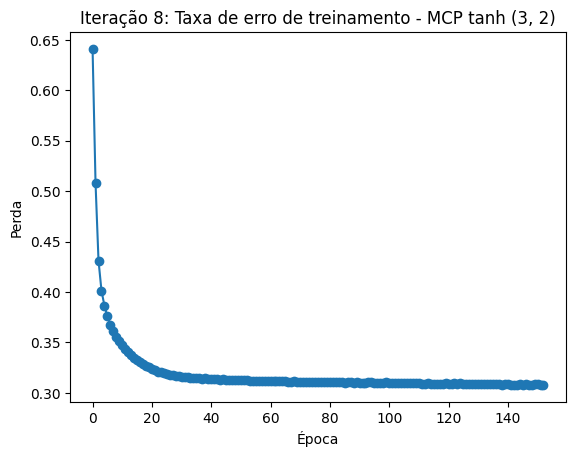

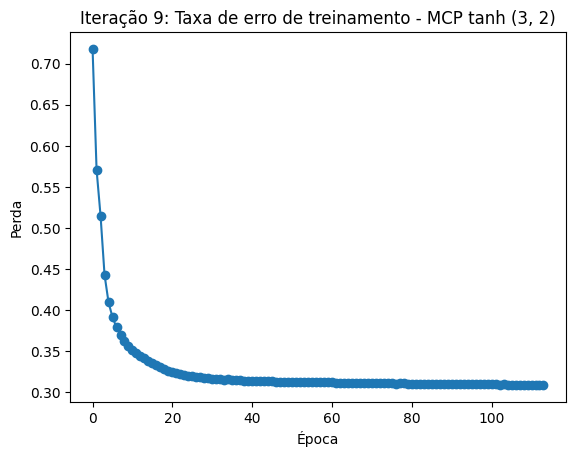

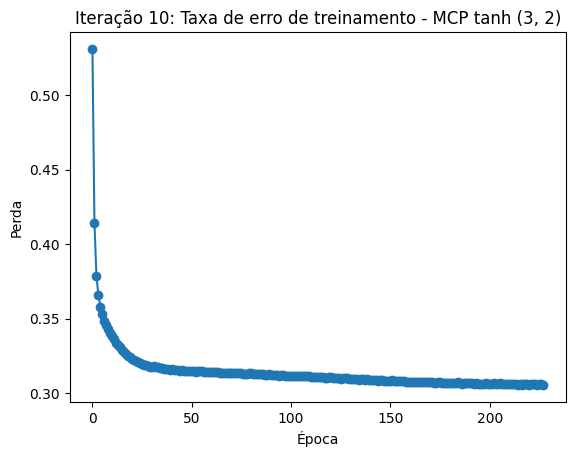

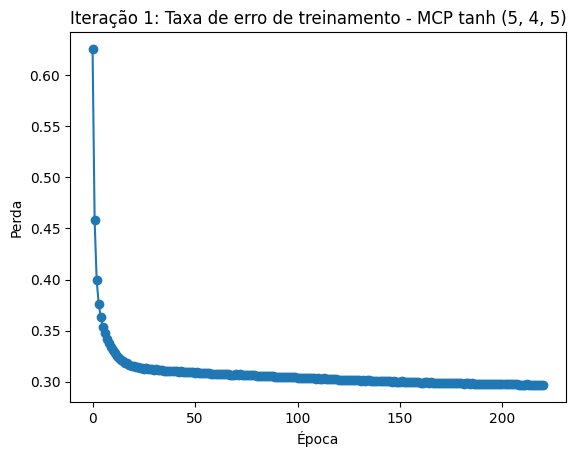

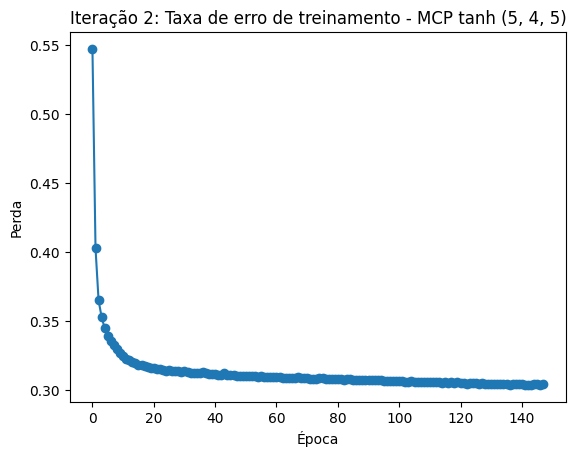

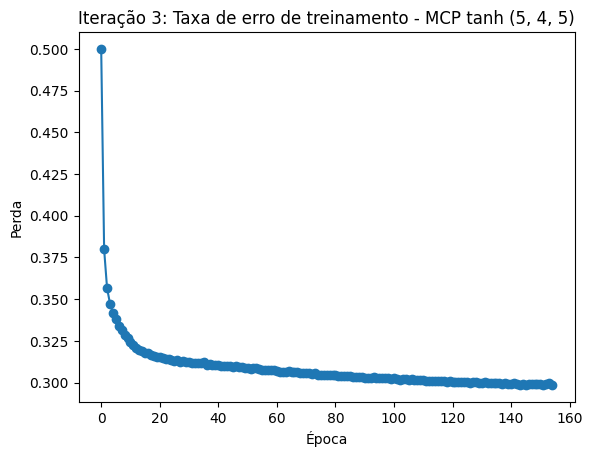

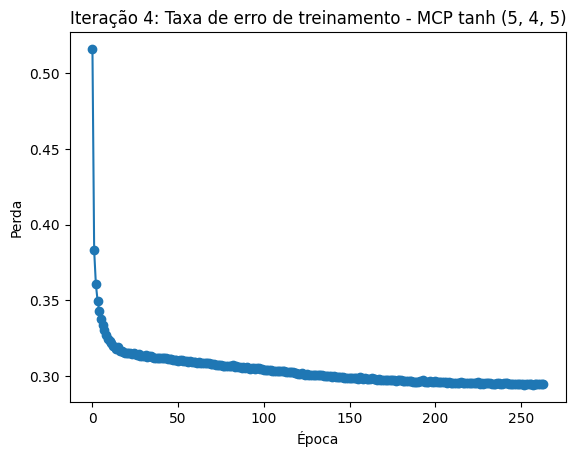

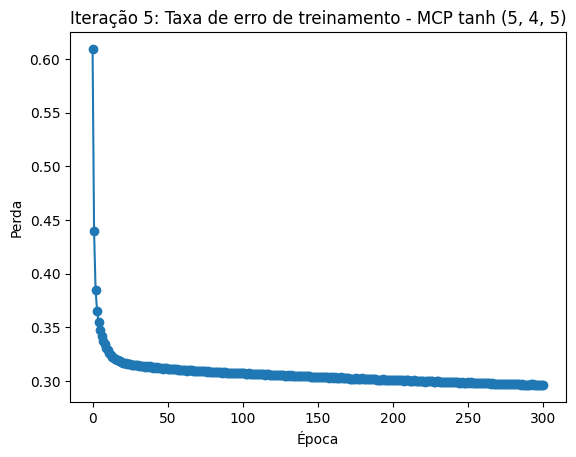

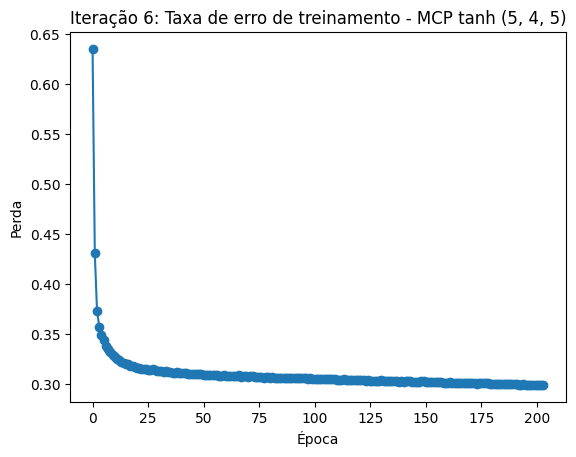

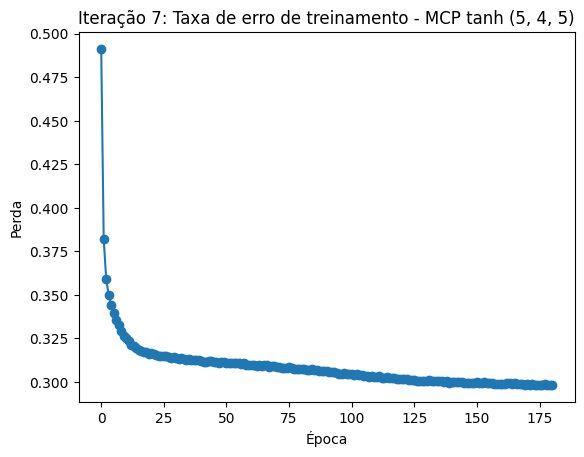

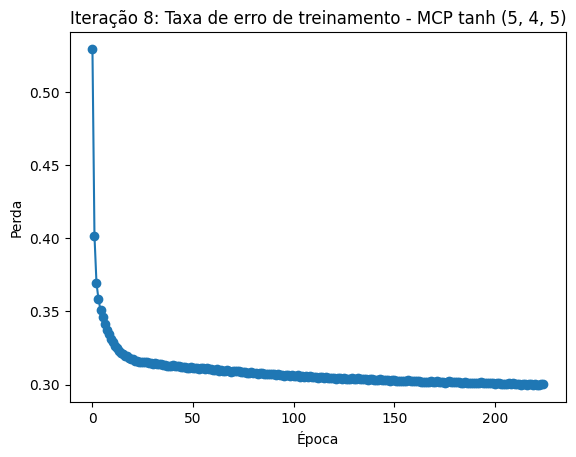

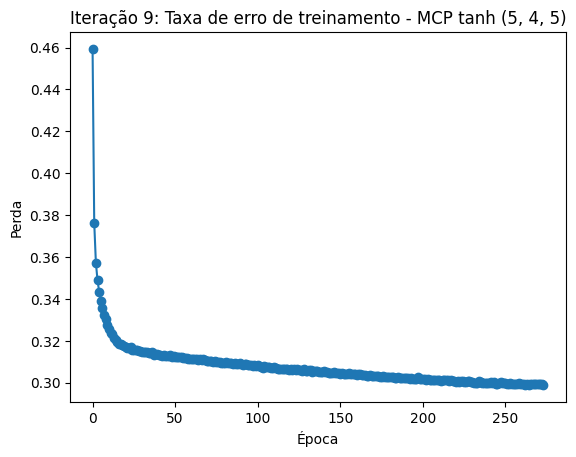

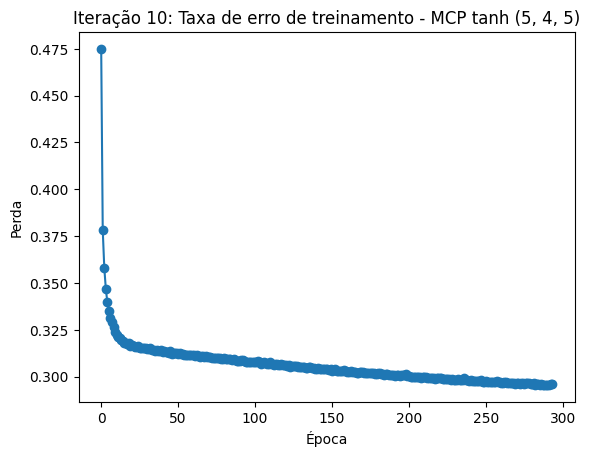

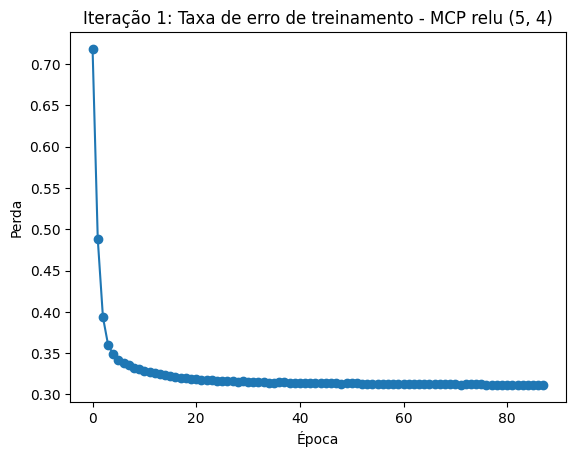

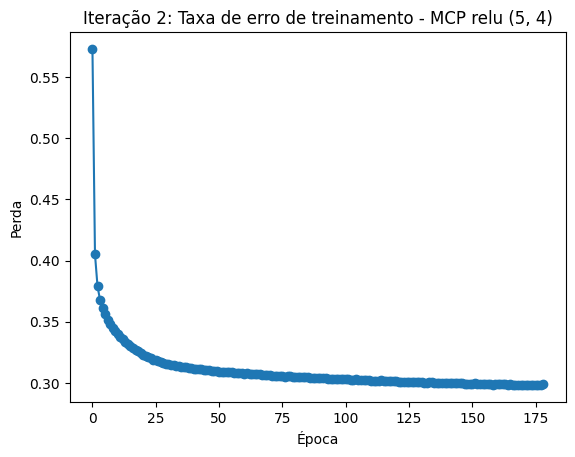

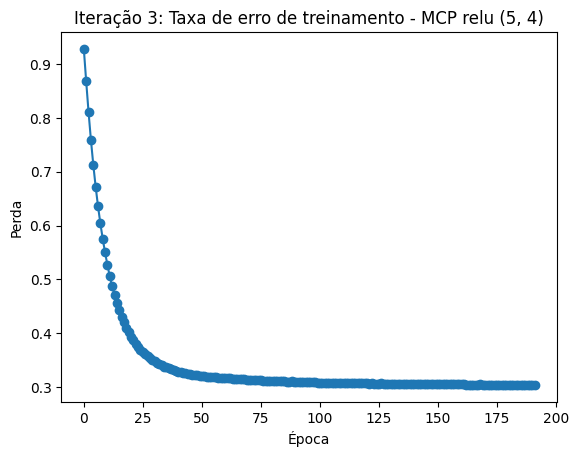

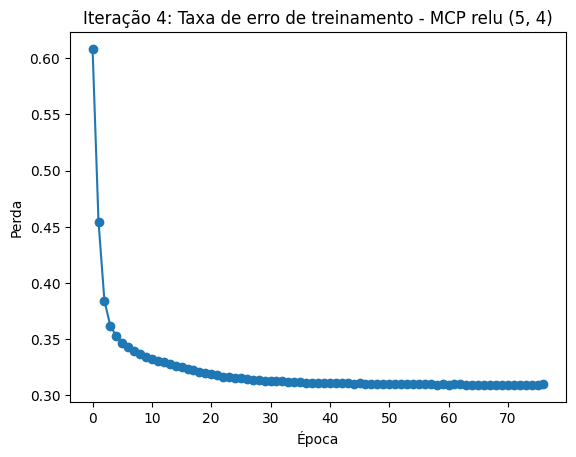

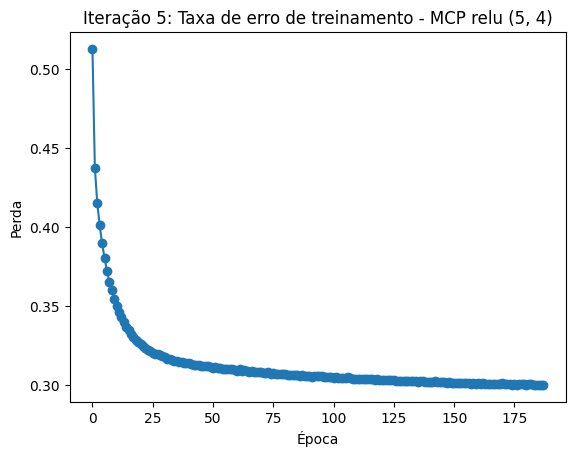

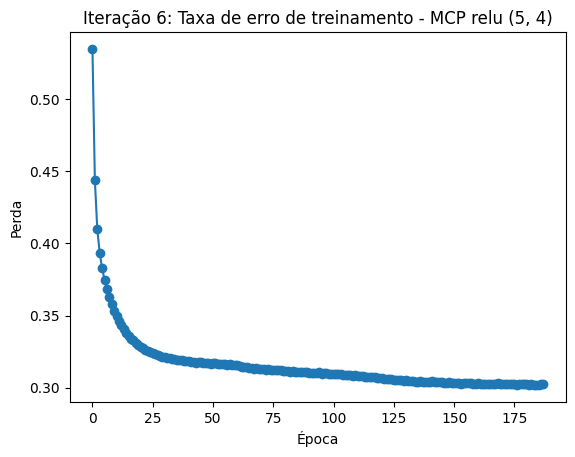

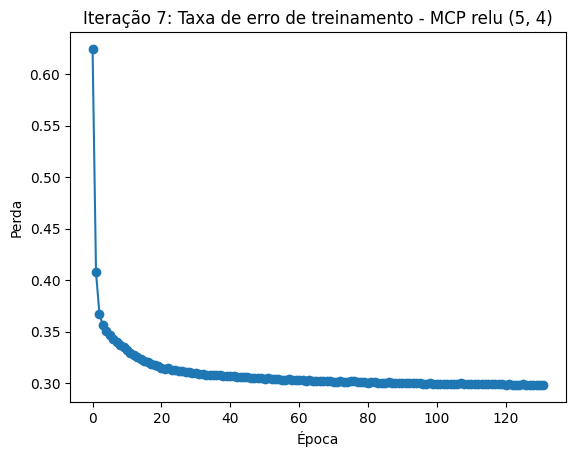

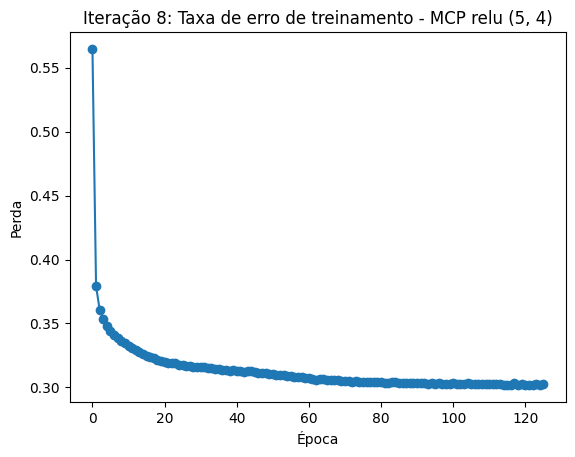

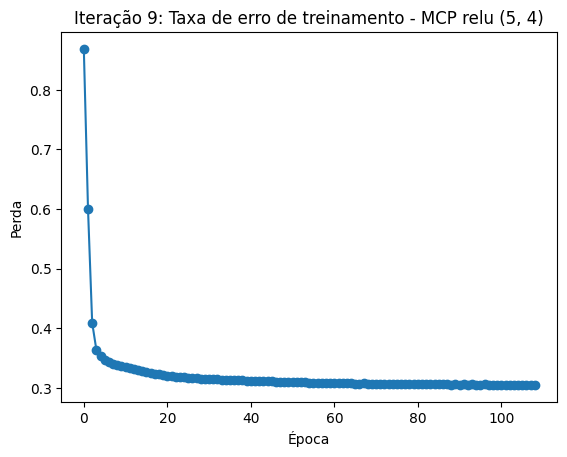

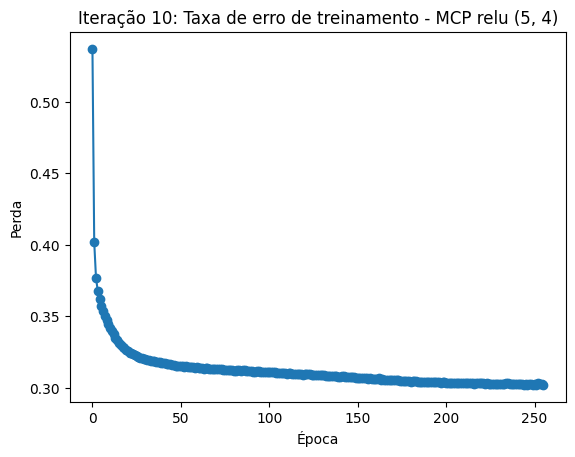

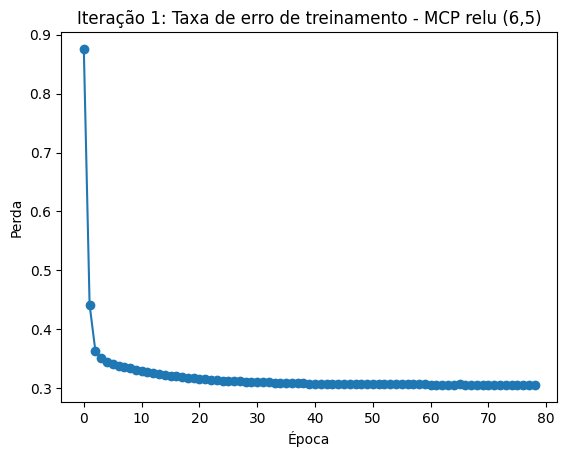

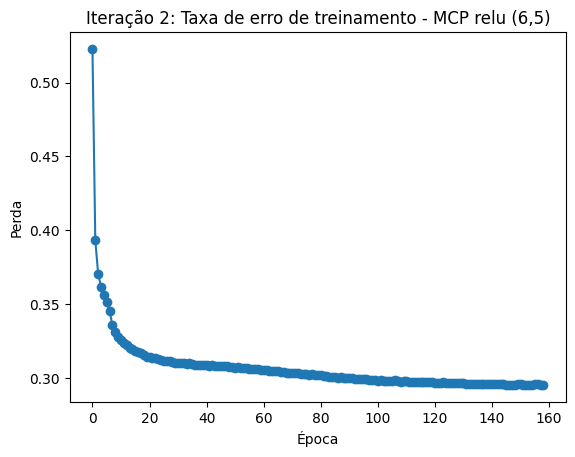

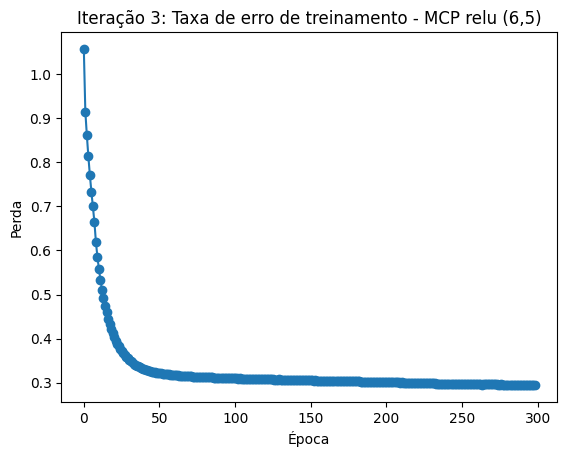

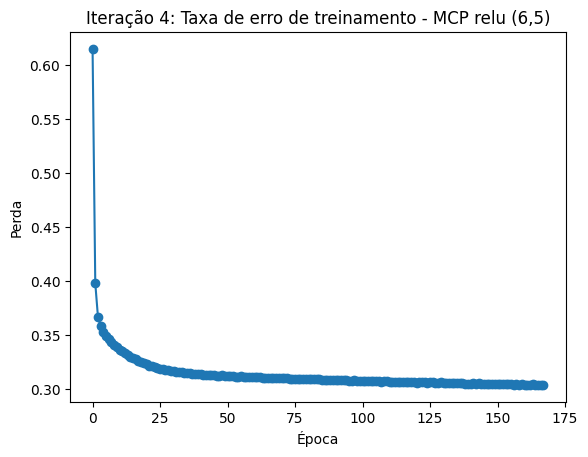

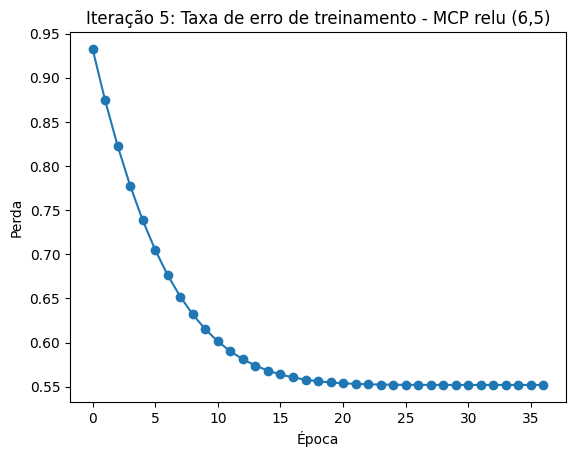

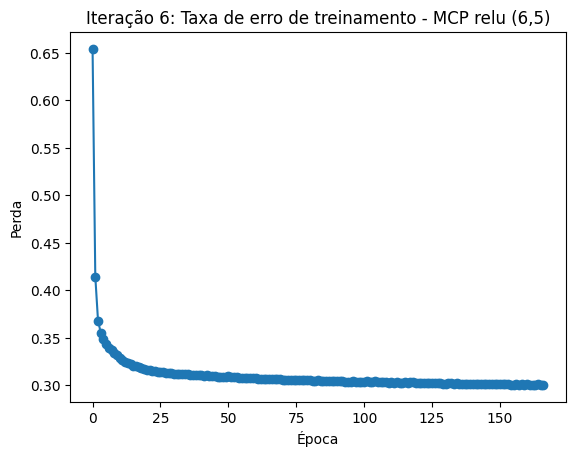

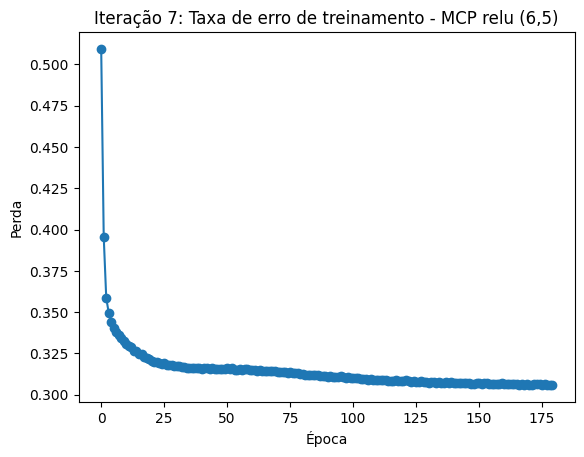

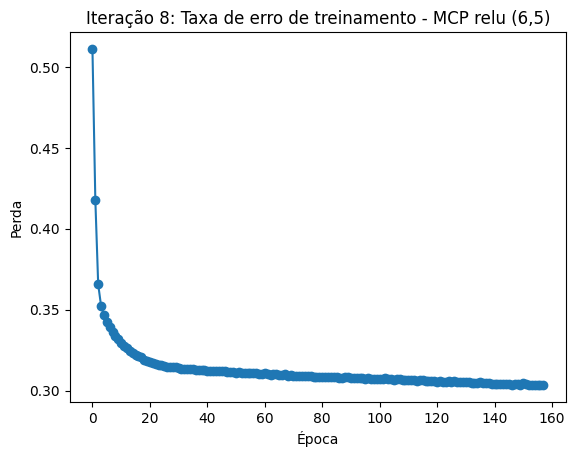

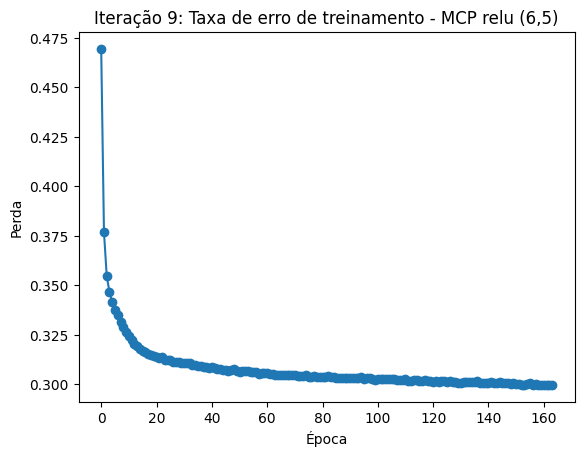

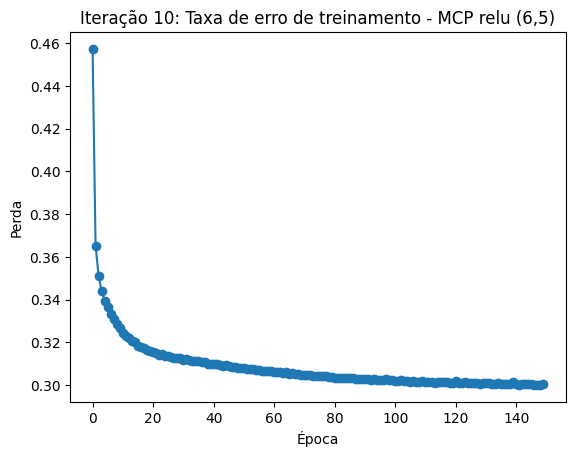

Estatísticas dos algoritmos executados:


,Algorítmos,% Acerto,% Erros
5,"Multilayer Perceptron com [5, 4, 5] neurônios ...",85.412007,14.587993
6,"Multilayer Perceptron com [5, 4] neurônios int...",85.252317,14.747683
4,"Multilayer Perceptron com [3, 2] neurônios int...",85.172461,14.827539
7,"Multilayer Perceptron com [6, 5] neurônios int...",84.367786,15.632214
3,10-KNN,83.120931,16.879069
2,5-KNN,82.503638,17.496362
0,Árvore de Decisão Com Critério Entropia,81.625264,18.374736
1,Árvore de Decisão Com Critério Gini,81.247529,18.752471
8,2-KMeans,75.919045,24.080955


In [44]:
#ADULT

#Lendo o CSV e Adicionando o header das colunas
url = 'https://raw.githubusercontent.com/mariarita26/TopicosEspeciais/main/adult.data'
dataFrame = pd.read_csv(url, sep=', ', names=[
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
    "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])

#Coluna irrelevante (equivale à education)
dataFrame = dataFrame.drop(columns="education-num")

y = dataFrame.pop('income')

#One-Hot Encoder para as colunas categóricas
column_transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']), remainder='passthrough'
)
dataFrame = column_transformer.fit_transform(dataFrame)
columns_names = column_transformer.get_feature_names_out()
X = pd.DataFrame(data=dataFrame)

#Normalização de todas as colunas
x2 = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
X = pd.DataFrame(x_scaled)
folds = 10
kf = StratifiedKFold(n_splits = folds)

#Declaração das variáveis

X_train = []
y_train = []

X_test = []
y_test = []

X = np.array(X)
y = np.array(y)

for train_index, test_index in kf.split(X, y):
  X_train.append(X[train_index])
  X_test.append(X[test_index])

  y_train.append(y[train_index])
  y_test.append(y[test_index])

results = {'Árvore de Decisão Com Critério Entropia': [],
           'Árvore de Decisão Com Critério Gini': [],
           '5-KNN': [],
           '10-KNN': [],
           'Multilayer Perceptron com [3, 2] neurônios internos e função de ativação tanh': [],
           'Multilayer Perceptron com [5, 4, 5] neurônios internos e função de ativação tanh': [],
           'Multilayer Perceptron com [5, 4] neurônios internos e função de ativação relu': [],
           'Multilayer Perceptron com [6, 5] neurônios internos e função de ativação relu': [],
           "2-KMeans": []}

def plot_loss_curve(model, title):
    plt.plot(model.loss_curve_, '-o')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.title(title)
    plt.show()

#Treinamento dos modelos


for i in range(folds):
    model = DecisionTreeClassifier(criterion="entropy")
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Árvore de Decisão Com Critério Entropia'].append(acc)

    model = DecisionTreeClassifier(criterion="gini")
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Árvore de Decisão Com Critério Gini'].append(acc)

    model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', algorithm='brute')
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['5-KNN'].append(acc)

    model = KNeighborsClassifier(n_neighbors=10, metric='euclidean', algorithm='brute')
    model = model.fit(X_train[i], y_train[i])
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['10-KNN'].append(acc)

    myset = set(y_train[i])
    clusters = len(myset)
    model = KMeans(n_clusters=clusters, algorithm='lloyd')
    model = model.fit(X_train[i])
    labels = model.labels_
    map_labels = []
    for a in range (clusters):
        map_labels.append([])

    new_y_train = y_train[i].tolist()

    for b in range(len(y_train[i])):
        for c in range(clusters):
            if labels[b] == c:
                map_labels[c].append(new_y_train[b])

    mapping = {}

    for d in range(clusters):
        final = Counter(map_labels[d])
        value = final.most_common(1)[0][0]
        mapping[d] = value

    result = model.predict(X_test[i])
    result = [mapping[j] for j in result]

    acc = metrics.accuracy_score(result, y_test[i])

    results['2-KMeans'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(3, 2), activation='tanh',max_iter=400)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP tanh (3, 2)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [3, 2] neurônios internos e função de ativação tanh'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(5, 4, 5), activation='tanh',max_iter=500)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP tanh (5, 4, 5)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [5, 4, 5] neurônios internos e função de ativação tanh'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(5, 4), activation='relu', max_iter=300)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP relu (5, 4)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [5, 4] neurônios internos e função de ativação relu'].append(acc)

for i in range(folds):
    model = MLPClassifier(hidden_layer_sizes=(6, 5), activation='relu',max_iter=500)
    model = model.fit(X_train[i], y_train[i])
    plot_loss_curve(model, f"Iteração {i+1}: Taxa de erro de treinamento - MCP relu (6,5)")
    result = model.predict(X_test[i])
    acc = metrics.accuracy_score(result, y_test[i])
    results['Multilayer Perceptron com [6, 5] neurônios internos e função de ativação relu'].append(acc)


#Impressão dos resultados
algoritmos = []
taxas_acerto = []
taxas_erro  = []

for key, value in results.items():
    taxa_acerto = np.mean(results[key])
    taxa_erro = 1 - taxa_acerto
    algoritmo = key

    algoritmos.append(algoritmo)
    taxas_acerto.append(taxa_acerto*100)
    taxas_erro.append(taxa_erro*100)


taxas = pd.DataFrame({
    "Algorítmos": algoritmos,
    "% Acerto": taxas_acerto,
    "% Erros": taxas_erro
})

# Ordenar o dataframe pela acurácia em ordem decrescente
relatorio_final = taxas.sort_values("% Acerto", ascending=False)

print('Estatísticas dos algoritmos executados:')
display(relatorio_final)
